# Slovakia EDA

# This notebook contains,
 1. Data loading and Cleaning.
 2. Exploratory Data Analysis. 
 3. Modeling.

## Importing the required libraries!

In [3]:
# importing the libraries related to the data manipulation.
import numpy as np
import pandas as pd

# importing the libraries related to the data_visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import missingno as msno

# Loading the dataset

In [4]:
# data_path = "C:\Users\SAMARTH P SHET\linear-comprehensive-covid-data.csv"

df = pd.read_csv(r"C:\Users\SAMARTH P SHET\linear-comprehensive-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
# size of the dataset
df.shape

(74866, 59)

In [6]:
# displaying the columns and the very basic info using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74866 entries, 0 to 74865
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               74866 non-null  object 
 1   continent                              71169 non-null  object 
 2   location                               74866 non-null  object 
 3   date                                   74866 non-null  object 
 4   total_cases                            73719 non-null  float64
 5   new_cases                              73717 non-null  float64
 6   new_cases_smoothed                     72716 non-null  float64
 7   total_deaths                           64490 non-null  float64
 8   new_deaths                             64648 non-null  float64
 9   new_deaths_smoothed                    72716 non-null  float64
 10  total_cases_per_million                73317 non-null  float64
 11  ne

## We'll be focusing on the dataset of Slovakia.

In [7]:
x = df.groupby(df.location)
Slovakia = x.get_group("Slovakia")

# Slovakia EDA

### here's the dataset for the country Slovakia 

In [8]:
Slovakia

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
60393,SVK,Europe,Slovakia,2020-03-06,1.0,1.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60394,SVK,Europe,Slovakia,2020-03-07,1.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60395,SVK,Europe,Slovakia,2020-03-08,3.0,2.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60396,SVK,Europe,Slovakia,2020-03-09,3.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60397,SVK,Europe,Slovakia,2020-03-10,7.0,4.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60762,SVK,Europe,Slovakia,2021-03-10,329593.0,3600.0,2176.286,8146.0,109.0,93.857,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60763,SVK,Europe,Slovakia,2021-03-11,331571.0,1978.0,2058.857,8244.0,98.0,97.714,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60764,SVK,Europe,Slovakia,2021-03-12,333872.0,2301.0,2041.429,8346.0,102.0,97.286,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
60765,SVK,Europe,Slovakia,2021-03-13,336235.0,2363.0,2018.714,8440.0,94.0,100.143,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86


### We change the index number starting from 60,393-60,766 to 0-373 for easy understaning and readability.

In [9]:
Slovakia=Slovakia.reset_index()
Slovakia.drop('index', axis=1, inplace=True)

In [10]:
Slovakia

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,SVK,Europe,Slovakia,2020-03-06,1.0,1.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
1,SVK,Europe,Slovakia,2020-03-07,1.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
2,SVK,Europe,Slovakia,2020-03-08,3.0,2.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
3,SVK,Europe,Slovakia,2020-03-09,3.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
4,SVK,Europe,Slovakia,2020-03-10,7.0,4.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,SVK,Europe,Slovakia,2021-03-10,329593.0,3600.0,2176.286,8146.0,109.0,93.857,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
370,SVK,Europe,Slovakia,2021-03-11,331571.0,1978.0,2058.857,8244.0,98.0,97.714,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
371,SVK,Europe,Slovakia,2021-03-12,333872.0,2301.0,2041.429,8346.0,102.0,97.286,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
372,SVK,Europe,Slovakia,2021-03-13,336235.0,2363.0,2018.714,8440.0,94.0,100.143,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86


In [11]:
Slovakia.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,SVK,Europe,Slovakia,2020-03-06,1.0,1.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
1,SVK,Europe,Slovakia,2020-03-07,1.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
2,SVK,Europe,Slovakia,2020-03-08,3.0,2.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
3,SVK,Europe,Slovakia,2020-03-09,3.0,0.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
4,SVK,Europe,Slovakia,2020-03-10,7.0,4.0,NaN,NaN,NaN,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86


In [12]:
Slovakia.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
369,SVK,Europe,Slovakia,2021-03-10,329593.0,3600.0,2176.286,8146.0,109.0,93.857,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
370,SVK,Europe,Slovakia,2021-03-11,331571.0,1978.0,2058.857,8244.0,98.0,97.714,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
371,SVK,Europe,Slovakia,2021-03-12,333872.0,2301.0,2041.429,8346.0,102.0,97.286,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
372,SVK,Europe,Slovakia,2021-03-13,336235.0,2363.0,2018.714,8440.0,94.0,100.143,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86
373,SVK,Europe,Slovakia,2021-03-14,337503.0,1268.0,2016.143,8528.0,88.0,98.857,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.86


In [13]:
# size of the dataset for country Slovakia
print(Slovakia.shape)

(374, 59)


## Displaying the dictionary of columns present in the dataset

In [14]:
Slovakia.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

## The method Slovakia.info() information about the given DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [15]:
Slovakia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               374 non-null    object 
 1   continent                              374 non-null    object 
 2   location                               374 non-null    object 
 3   date                                   374 non-null    object 
 4   total_cases                            374 non-null    float64
 5   new_cases                              374 non-null    float64
 6   new_cases_smoothed                     369 non-null    float64
 7   total_deaths                           348 non-null    float64
 8   new_deaths                             348 non-null    float64
 9   new_deaths_smoothed                    369 non-null    float64
 10  total_cases_per_million                374 non-null    float64
 11  new_ca

## We now find the null values present in the given series of object. Using the 'isnull().sum()' function, one can find the number of missing values per column.

In [16]:
Slovakia.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              26
new_deaths                                26
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  26
new_deaths_per_million                    26
new_deaths_smoothed_per_million            5
reproduction_rate                         14
icu_patients                             374
icu_patients_per_million                 374
hosp_patients                             62
hosp_patients_per_million                 62
weekly_icu_admissions                    374
weekly_icu

## We can also determine the null values in-terms of percentage

In [17]:
features_with_na=[features for features in Slovakia.columns if Slovakia[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(Slovakia[feature].isnull().mean(), 4),  ' % missing values')

new_cases_smoothed 0.0134  % missing values
total_deaths 0.0695  % missing values
new_deaths 0.0695  % missing values
new_deaths_smoothed 0.0134  % missing values
new_cases_smoothed_per_million 0.0134  % missing values
total_deaths_per_million 0.0695  % missing values
new_deaths_per_million 0.0695  % missing values
new_deaths_smoothed_per_million 0.0134  % missing values
reproduction_rate 0.0374  % missing values
icu_patients 1.0  % missing values
icu_patients_per_million 1.0  % missing values
hosp_patients 0.1658  % missing values
hosp_patients_per_million 0.1658  % missing values
weekly_icu_admissions 1.0  % missing values
weekly_icu_admissions_per_million 1.0  % missing values
weekly_hosp_admissions 1.0  % missing values
weekly_hosp_admissions_per_million 1.0  % missing values
new_tests_smoothed 0.0214  % missing values
new_tests_smoothed_per_thousand 0.0214  % missing values
positive_rate 0.0187  % missing values
tests_per_case 0.0348  % missing values
total_vaccinations 0.8155  % 

## We are findingt the recoverd cases in the country Slovakia using the formula 
   ## recovered cases = [total cases]-[total deaths]-[New cases] 

In [18]:
Slovakia['recovered_cases'] = Slovakia['total_cases']-Slovakia['total_deaths'] - Slovakia['new_cases']
Slovakia.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,recovered_cases
count,374.000000,374.000000,369.000000,348.000000,348.000000,369.000000,374.000000,374.000000,369.000000,348.000000,...,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,0.0,3.740000e+02,3.740000e+02,3.740000e+02,348.000000
mean,73280.117647,902.414439,897.614409,1290.652299,24.505747,22.323672,13422.144572,165.288171,164.408973,236.398750,...,7.000000e-01,2.879590e+02,7.290000e+00,2.310000e+01,3.770000e+01,NaN,5.820000e+00,7.754000e+01,8.600000e-01,76485.738506
std,103901.093482,1176.685369,1025.444700,2243.073107,38.447726,34.216058,19030.748612,215.524256,187.822644,410.846089,...,4.780354e-15,1.650667e-12,2.757041e-14,1.600863e-13,2.276783e-13,NaN,1.067242e-14,6.118853e-13,8.004314e-15,102726.143298
min,1.000000,0.000000,0.857000,1.000000,0.000000,0.000000,0.183000,0.000000,0.157000,0.183000,...,7.000000e-01,2.879590e+02,7.290000e+00,2.310000e+01,3.770000e+01,NaN,5.820000e+00,7.754000e+01,8.600000e-01,362.000000
25%,1528.500000,14.000000,18.714000,28.000000,0.000000,0.000000,279.963500,2.564000,3.428000,5.129000,...,7.000000e-01,2.879590e+02,7.290000e+00,2.310000e+01,3.770000e+01,NaN,5.820000e+00,7.754000e+01,8.600000e-01,1611.750000
50%,4807.500000,117.500000,131.143000,39.500000,0.500000,0.714000,880.552500,21.521500,24.020000,7.234500,...,7.000000e-01,2.879590e+02,7.290000e+00,2.310000e+01,3.770000e+01,NaN,5.820000e+00,7.754000e+01,8.600000e-01,6677.000000
75%,126545.500000,1843.750000,1956.429000,1393.500000,35.750000,26.571000,23178.346750,337.705250,358.344000,255.236250,...,7.000000e-01,2.879590e+02,7.290000e+00,2.310000e+01,3.770000e+01,NaN,5.820000e+00,7.754000e+01,8.600000e-01,138455.750000
max,337503.000000,6315.000000,3259.857000,8528.000000,204.000000,102.429000,61817.778000,1156.669000,597.082000,1562.007000,...,7.000000e-01,2.879590e+02,7.290000e+00,2.310000e+01,3.770000e+01,NaN,5.820000e+00,7.754000e+01,8.600000e-01,327707.000000


## Using the heatmap, we can clearly locate the null values present in each column. As the heatmap denotes the null values in a different color as shown below. 

Text(0.5, 1.0, 'Heatmap showing the null values present in dataframe-Slovakia_EDA')

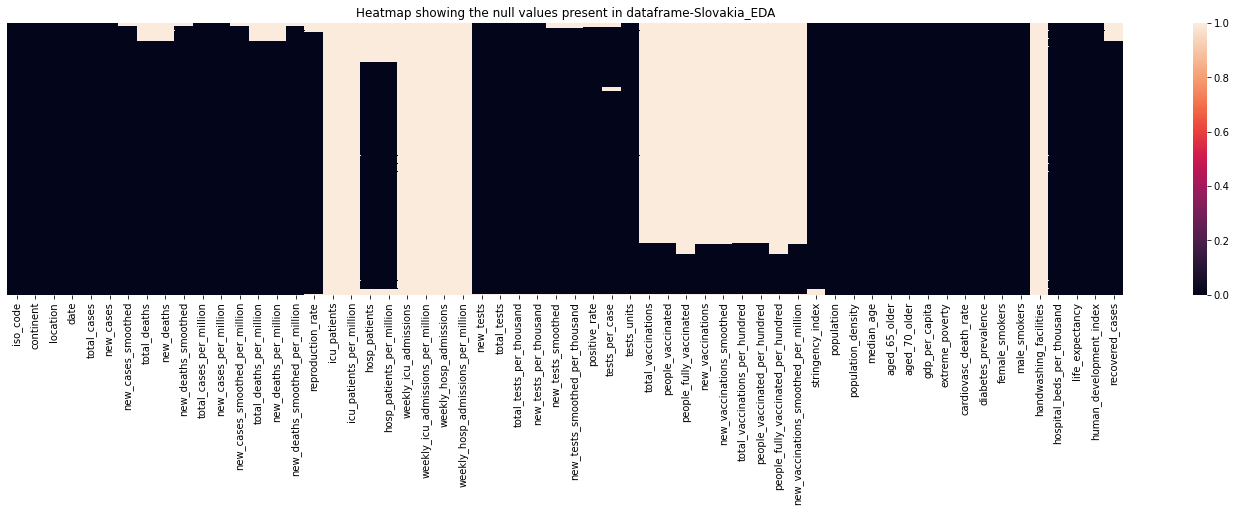

In [19]:
plt.figure(figsize=(25,5))
sns.heatmap(Slovakia.isnull(),yticklabels=False)
plt.title("Heatmap showing the null values present in dataframe-Slovakia_EDA")

In [20]:
Slovakia.drop(columns=['icu_patients', 'icu_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million',
                       'weekly_icu_admissions_per_million','weekly_hosp_admissions_per_million',
                       'handwashing_facilities'], axis =1 ,inplace =True)
Slovakia.drop(columns=['weekly_hosp_admissions'], axis =1 ,inplace =True)

## These coulmns are filled with the mean values so as to remove the null value from the respective columns

In [21]:
Slovakia['total_vaccinations']=Slovakia['total_vaccinations'].fillna(Slovakia['total_vaccinations'].mean())
Slovakia['people_vaccinated']=Slovakia['people_vaccinated'].fillna(Slovakia['people_vaccinated'].mean())

Slovakia['people_fully_vaccinated']=Slovakia['people_fully_vaccinated'].fillna(Slovakia['people_fully_vaccinated'].mean())
Slovakia['new_vaccinations']=Slovakia['new_vaccinations'].fillna(Slovakia['new_vaccinations'].mean())

Slovakia['new_vaccinations_smoothed']=Slovakia['new_vaccinations_smoothed'].fillna(Slovakia['new_vaccinations_smoothed'].mean())
Slovakia['total_vaccinations_per_hundred']=Slovakia['total_vaccinations_per_hundred'].fillna(Slovakia['total_vaccinations_per_hundred'].mean())

Slovakia['people_vaccinated_per_hundred']=Slovakia['people_vaccinated_per_hundred'].fillna(Slovakia['people_vaccinated_per_hundred'].mean())
Slovakia['people_fully_vaccinated_per_hundred']=Slovakia['people_fully_vaccinated_per_hundred'].fillna(Slovakia['people_fully_vaccinated_per_hundred'].mean())

Slovakia['new_vaccinations']=Slovakia['new_vaccinations'].fillna(Slovakia['new_vaccinations'].mean())
Slovakia['new_vaccinations_smoothed_per_million']=Slovakia['new_vaccinations_smoothed_per_million'].fillna(Slovakia['new_vaccinations_smoothed_per_million'].mean())
Slovakia['recovered_cases']=Slovakia['recovered_cases'].fillna(Slovakia['recovered_cases'].mean())

## These coulmns are filled with the mean values so as to remove the null value from the respective columns

In [22]:
Slovakia['new_cases_smoothed']=Slovakia['new_cases_smoothed'].fillna(Slovakia['new_cases_smoothed'].mean())
Slovakia['total_deaths']=Slovakia['total_deaths'].fillna(Slovakia['total_deaths'].mean())

Slovakia['new_deaths']=Slovakia['new_deaths'].fillna(Slovakia['new_deaths'].mean())
Slovakia['new_deaths_smoothed']=Slovakia['new_deaths_smoothed'].fillna(Slovakia['new_deaths_smoothed'].mean())

Slovakia['new_cases_smoothed_per_million']=Slovakia['new_cases_smoothed_per_million'].fillna(Slovakia['new_cases_smoothed_per_million'].mean())
Slovakia['new_deaths_per_million']=Slovakia['new_deaths_per_million'].fillna(Slovakia['new_deaths_per_million'].mean())

Slovakia['total_deaths_per_million']=Slovakia['total_deaths_per_million'].fillna(Slovakia['total_deaths_per_million'].mean())
Slovakia['new_deaths_smoothed_per_million']=Slovakia['new_deaths_smoothed_per_million'].fillna(Slovakia['new_deaths_smoothed_per_million'].mean())

Slovakia['reproduction_rate']=Slovakia['reproduction_rate'].fillna(Slovakia['reproduction_rate'].mean())
Slovakia['hosp_patients']=Slovakia['hosp_patients'].fillna(Slovakia['hosp_patients'].mean())

Slovakia['hosp_patients_per_million']=Slovakia['hosp_patients_per_million'].fillna(Slovakia['hosp_patients_per_million'].mean())
Slovakia['new_tests_smoothed']=Slovakia['new_tests_smoothed'].fillna(Slovakia['new_tests_smoothed'].mean())

Slovakia['new_tests_smoothed_per_thousand']=Slovakia['new_tests_smoothed_per_thousand'].fillna(Slovakia['new_tests_smoothed_per_thousand'].mean())
Slovakia['positive_rate']=Slovakia['positive_rate'].fillna(Slovakia['positive_rate'].median())
Slovakia['tests_per_case']=Slovakia['tests_per_case'].fillna(Slovakia['tests_per_case'].mean())

Slovakia['stringency_index']=Slovakia['stringency_index'].fillna(Slovakia['stringency_index'].mean())
Slovakia['new_tests']=Slovakia['new_tests'].fillna(Slovakia['new_tests'].mean())

Slovakia['total_tests']=Slovakia['total_tests'].fillna(Slovakia['total_tests'].mean())
Slovakia['total_tests_per_thousand']=Slovakia['total_tests_per_thousand'].fillna(Slovakia['total_tests_per_thousand'].mean())

Slovakia['new_tests_per_thousand']=Slovakia['new_tests_per_thousand'].fillna(Slovakia['new_tests_per_thousand'].mean())
Slovakia['tests_units']=Slovakia['tests_units'].fillna(0)

Text(0.5, 1.0, 'Heatmap showing the null values present in dataframe-Slovakia_EDA')

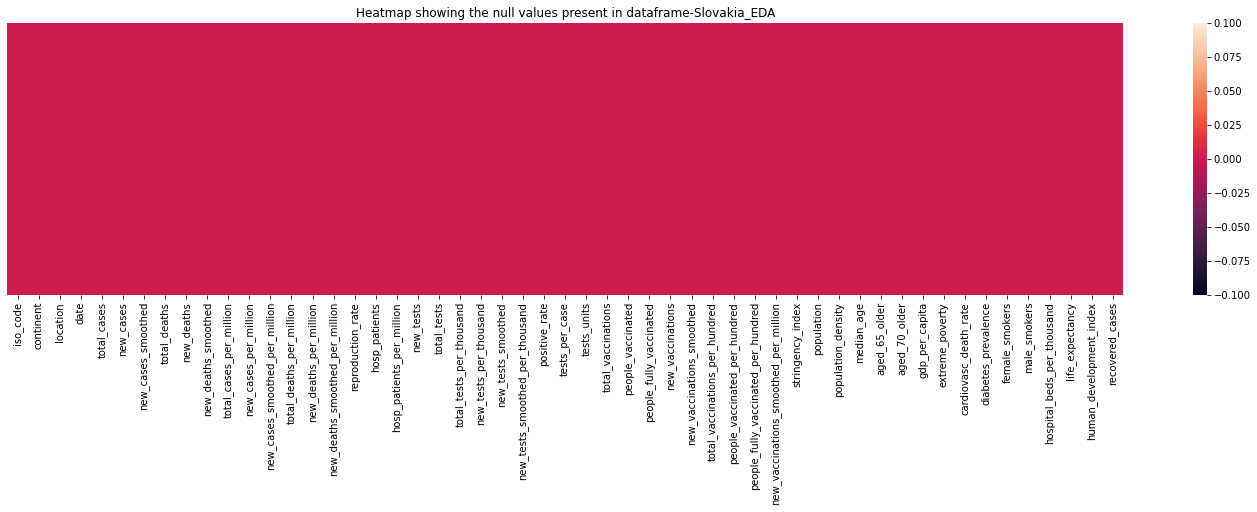

In [23]:
plt.figure(figsize=(25,5))
sns.heatmap(Slovakia.isnull(),yticklabels=False)
plt.title("Heatmap showing the null values present in dataframe-Slovakia_EDA")

In [24]:
Slovakia.isnull().sum().sum()

0

### Now, the dataset is cleaned!!

# EDA

## Univariate Analysis

### After removing the columns which had the maximum number of null values, there are some more columns which are having the null values, so we can clearly understand them using the distrubution plot as folllows

##  Distrubution plot for total cases

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count       374.000000
mean      73280.117647
std      103901.093482
min           1.000000
25%        1528.500000
50%        4807.500000
75%      126545.500000
max      337503.000000
Name: total_cases, dtype: float64

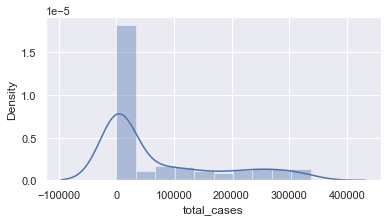

In [25]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.total_cases)
Slovakia['total_cases'].describe()

## Distrubution plot for total deaths

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count     374.000000
mean     1290.652299
std      2163.484310
min         1.000000
25%        28.000000
50%        55.000000
75%      1290.652299
max      8528.000000
Name: total_deaths, dtype: float64

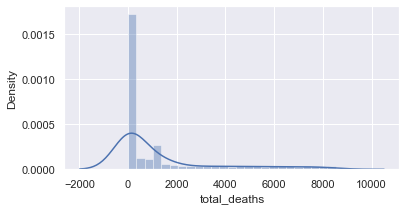

In [26]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.total_deaths)
Slovakia['total_deaths'].describe()

## 1. Distrubution plot for total vaccinations provided

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count       374.000000
mean     256619.318841
std       80151.709787
min           0.000000
25%      256619.318841
50%      256619.318841
75%      256619.318841
max      620928.000000
Name: total_vaccinations, dtype: float64

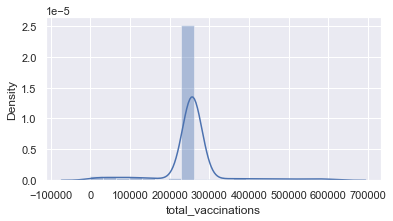

In [27]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.total_vaccinations)
Slovakia['total_vaccinations'].describe()

## 2. Distrubution plot showing the number of people vaccinated

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count       374.000000
mean     192372.898551
std       51031.097983
min           0.000000
25%      192372.898551
50%      192372.898551
75%      192372.898551
max      406262.000000
Name: people_vaccinated, dtype: float64

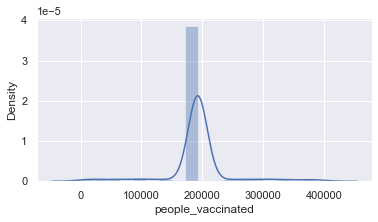

In [28]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.people_vaccinated)
Slovakia['people_vaccinated'].describe()

## 3. Distrubution plot for total vaccinations provided

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count       374.000000
mean     256619.318841
std       80151.709787
min           0.000000
25%      256619.318841
50%      256619.318841
75%      256619.318841
max      620928.000000
Name: total_vaccinations, dtype: float64

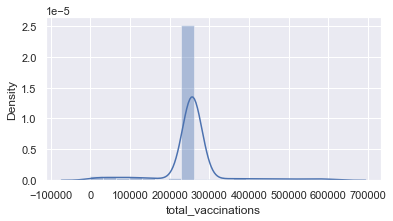

In [29]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.total_vaccinations)
Slovakia['total_vaccinations'].describe()

## 4. Distrubution plot shows that people who are fully vaccinated

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count       374.000000
mean      80600.054545
std       26749.465572
min         582.000000
25%       80600.054545
50%       80600.054545
75%       80600.054545
max      214666.000000
Name: people_fully_vaccinated, dtype: float64

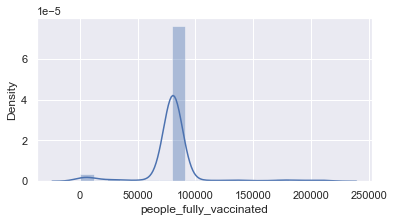

In [30]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.people_fully_vaccinated)
Slovakia['people_fully_vaccinated'].describe()

## 5. Distrubution plot for the new_vaccinations available

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      374.000000
mean      9131.294118
std       2153.532093
min          0.000000
25%       9131.294118
50%       9131.294118
75%       9131.294118
max      23746.000000
Name: new_vaccinations, dtype: float64

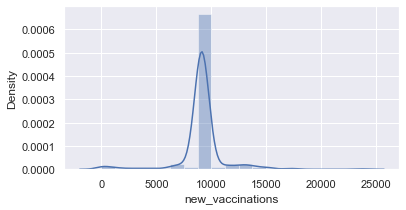

In [31]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.new_vaccinations)
Slovakia['new_vaccinations'].describe()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      374.000000
mean      8685.544118
std       1300.425198
min        425.000000
25%       8685.544118
50%       8685.544118
75%       8685.544118
max      13711.000000
Name: new_vaccinations_smoothed, dtype: float64

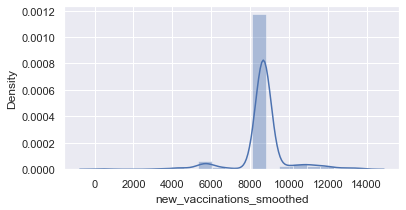

In [32]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.new_vaccinations_smoothed)
Slovakia['new_vaccinations_smoothed'].describe()

## 6. Distrubution plot for total_vaccinations_per_hundred

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    374.000000
mean       4.700000
std        1.467856
min        0.000000
25%        4.700000
50%        4.700000
75%        4.700000
max       11.370000
Name: total_vaccinations_per_hundred, dtype: float64

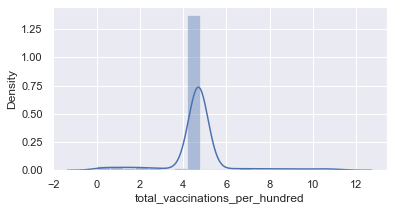

In [33]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.total_vaccinations_per_hundred)
Slovakia['total_vaccinations_per_hundred'].describe()

In [34]:
## 7. Distrubution plot for 

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    374.000000
mean       3.523333
std        0.934642
min        0.000000
25%        3.523333
50%        3.523333
75%        3.523333
max        7.440000
Name: people_vaccinated_per_hundred, dtype: float64

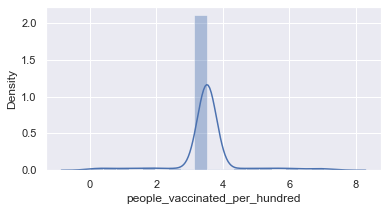

In [35]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.people_vaccinated_per_hundred)
Slovakia['people_vaccinated_per_hundred'].describe()

## 8. Distrubution plot for people_fully_vaccinated_per_hundred

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    374.000000
mean       1.476364
std        0.489974
min        0.010000
25%        1.476364
50%        1.476364
75%        1.476364
max        3.930000
Name: people_fully_vaccinated_per_hundred, dtype: float64

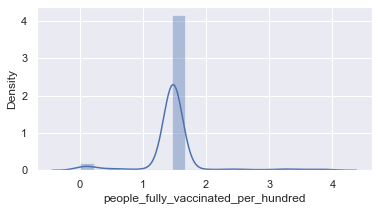

In [36]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.people_fully_vaccinated_per_hundred)
Slovakia['people_fully_vaccinated_per_hundred'].describe()

## 9. Distrubution plot for new_vaccinations_smoothed_per_million

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count     374.000000
mean     1590.882353
std       238.168059
min        78.000000
25%      1590.882353
50%      1590.882353
75%      1590.882353
max      2511.000000
Name: new_vaccinations_smoothed_per_million, dtype: float64

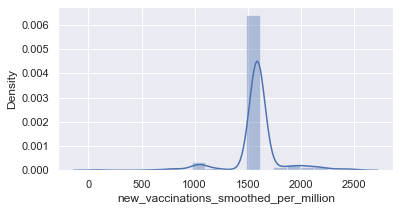

In [37]:
sns.set(rc={'figure.figsize':(6,3)})
sns.distplot(Slovakia.new_vaccinations_smoothed_per_million)
Slovakia['new_vaccinations_smoothed_per_million'].describe()

In [38]:
Slovakia.describe().loc[:,['total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations',
                           'new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                           'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','recovered_cases']]

,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,recovered_cases
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,256619.318841,192372.898551,80600.054545,9131.294118,8685.544118,4.700000,3.523333,1.476364,1590.882353,76485.738506
std,80151.709787,51031.097983,26749.465572,2153.532093,1300.425198,1.467856,0.934642,0.489974,238.168059,99081.210758
min,0.000000,0.000000,582.000000,0.000000,425.000000,0.000000,0.000000,0.010000,78.000000,362.000000
25%,256619.318841,192372.898551,80600.054545,9131.294118,8685.544118,4.700000,3.523333,1.476364,1590.882353,1677.000000
50%,256619.318841,192372.898551,80600.054545,9131.294118,8685.544118,4.700000,3.523333,1.476364,1590.882353,12675.000000
75%,256619.318841,192372.898551,80600.054545,9131.294118,8685.544118,4.700000,3.523333,1.476364,1590.882353,123022.250000
max,620928.000000,406262.000000,214666.000000,23746.000000,13711.000000,11.370000,7.440000,3.930000,2511.000000,327707.000000


## The following heatmap shows that its the correlation heatmap representing the country Slovakia. The correlation matrix contains the number of vaccinations which were available and how many people are vaccinated partially and how many people are fully vaccinated

,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,recovered_cases
total_vaccinations,1.000000,0.992435,0.786163,0.540362,0.912520,1.000000,0.992431,0.786167,0.912511,0.169393
people_vaccinated,0.992435,1.000000,0.710602,0.549724,0.929208,0.992439,0.999999,0.710609,0.929210,0.171019
people_fully_vaccinated,0.786163,0.710602,1.000000,0.363138,0.637482,0.786127,0.710591,0.999998,0.637441,0.119172
new_vaccinations,0.540362,0.549724,0.363138,1.000000,0.598241,0.540333,0.549622,0.363219,0.598334,0.090929
new_vaccinations_smoothed,0.912520,0.929208,0.637482,0.598241,1.000000,0.912479,0.929222,0.637432,1.000000,0.157760
total_vaccinations_per_hundred,1.000000,0.992439,0.786127,0.540333,0.912479,1.000000,0.992435,0.786131,0.912471,0.169394
people_vaccinated_per_hundred,0.992431,0.999999,0.710591,0.549622,0.929222,0.992435,1.000000,0.710598,0.929224,0.171017
people_fully_vaccinated_per_hundred,0.786167,0.710609,0.999998,0.363219,0.637432,0.786131,0.710598,1.000000,0.637391,0.119171
new_vaccinations_smoothed_per_million,0.912511,0.929210,0.637441,0.598334,1.000000,0.912471,0.929224,0.637391,1.000000,0.157761
recovered_cases,0.169393,0.171019,0.119172,0.090929,0.157760,0.169394,0.171017,0.119171,0.157761,1.000000


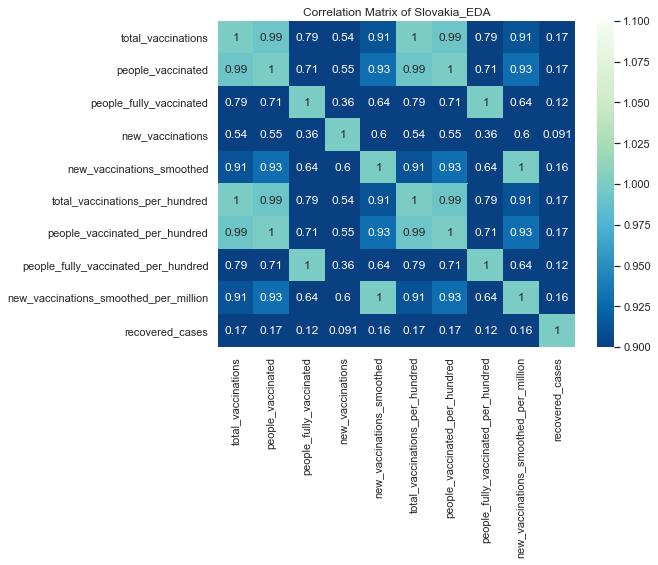

In [39]:
Slovakia_corr = Slovakia[['total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations',
                           'new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                           'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','recovered_cases']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(Slovakia_corr,annot = True,vmin =1,vmax=1,cmap ='GnBu_r')
plt.title("Correlation Matrix of Slovakia_EDA")
Slovakia_corr

## The following correlation matrix contains the number of deaths that took place and the positive rate and the number of test per case

,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,hosp_patients,hosp_patients_per_million,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case
new_cases_smoothed,1.000000,0.637588,0.728156,0.804309,1.000000,0.728158,0.637588,0.804310,-0.196666,0.819735,0.819735,0.593849,0.593849,0.565449,-0.351055
total_deaths,0.637588,1.000000,0.859386,0.928605,0.637588,0.859387,1.000000,0.928606,-0.265872,0.801125,0.801125,0.940720,0.940720,-0.074475,-0.191271
new_deaths,0.728156,0.859386,1.000000,0.907055,0.728156,1.000000,0.859386,0.907057,-0.279955,0.838465,0.838465,0.800032,0.800032,0.113662,-0.236375
new_deaths_smoothed,0.804309,0.928605,0.907055,1.000000,0.804309,0.907056,0.928605,1.000000,-0.310590,0.895422,0.895422,0.881665,0.881664,0.096720,-0.230398
new_cases_smoothed_per_million,1.000000,0.637588,0.728156,0.804309,1.000000,0.728158,0.637588,0.804310,-0.196666,0.819735,0.819735,0.593849,0.593849,0.565449,-0.351055
new_deaths_per_million,0.728158,0.859387,1.000000,0.907056,0.728158,1.000000,0.859387,0.907058,-0.279954,0.838465,0.838465,0.800034,0.800034,0.113664,-0.236375
total_deaths_per_million,0.637588,1.000000,0.859386,0.928605,0.637588,0.859387,1.000000,0.928606,-0.265872,0.801125,0.801125,0.940720,0.940720,-0.074475,-0.191271
new_deaths_smoothed_per_million,0.804310,0.928606,0.907057,1.000000,0.804310,0.907058,0.928606,1.000000,-0.310586,0.895423,0.895423,0.881665,0.881665,0.096719,-0.230400
reproduction_rate,-0.196666,-0.265872,-0.279955,-0.310590,-0.196666,-0.279954,-0.265872,-0.310586,1.000000,-0.335120,-0.335119,-0.253892,-0.253893,0.227715,-0.576914
hosp_patients,0.819735,0.801125,0.838465,0.895422,0.819735,0.838465,0.801125,0.895423,-0.335120,1.000000,1.000000,0.772999,0.772999,0.237112,-0.331820


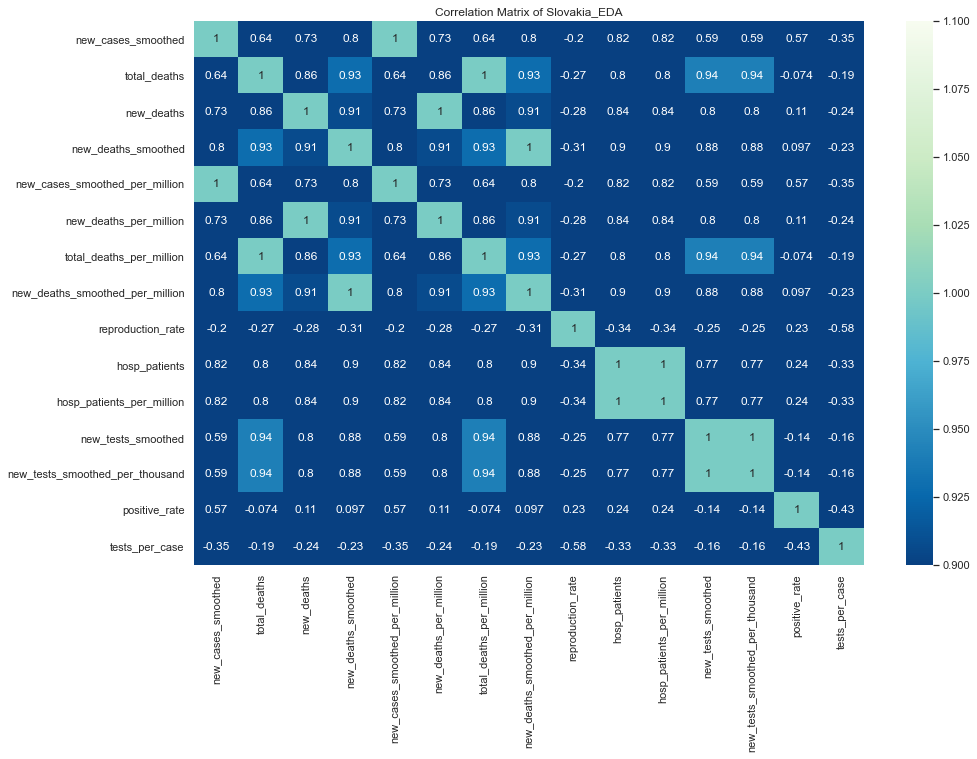

In [40]:
Slovakia_corr = Slovakia[['new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed','new_cases_smoothed_per_million',
                           'new_deaths_per_million','total_deaths_per_million','new_deaths_smoothed_per_million','reproduction_rate',
                          'hosp_patients','hosp_patients_per_million','new_tests_smoothed','new_tests_smoothed_per_thousand',
                           'positive_rate','tests_per_case']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(Slovakia_corr,annot = True,vmin =1,vmax=1,cmap ='GnBu_r')
plt.title("Correlation Matrix of Slovakia_EDA")
Slovakia_corr

## As we can observe in the above table, that the date in the given dataframe is of the type object. So converting it into data_time object. And also adding month and year to perform EDA 

In [41]:
Slovakia['date'] = pd.to_datetime(Slovakia['date'],format='%Y-%m-%d') 
Slovakia['months'] = Slovakia['date'].dt.month_name()
Slovakia['year'] = Slovakia['date'].dt.year
Slovakia['month'] = Slovakia['months'] + Slovakia['year'].astype(str)

In [42]:
print("Starting date =",Slovakia['date'].min())
print("End date =",Slovakia['date'].max())
print("Length of data with respect to days :",Slovakia['date'].max()-Slovakia['date'].min())

Starting date = 2020-03-06 00:00:00
End date = 2021-03-14 00:00:00
Length of data with respect to days : 373 days 00:00:00


## So we have the Slovakia _country data for 373 days that is from 6th march 2020 (2020-03-06) to 14th March 2020 (2020-03-14) 

## Now we can obsverve the given data interms of line_plot which shows the clear representation of that particular feature with respect to that particular date

### 1. plot showing the number of total cases with respect to date

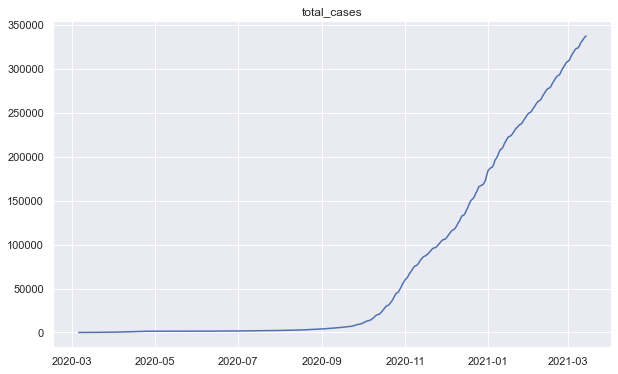

In [43]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['total_cases'])
plt.title('total_cases')
plt.tick_params(axis='x', rotation=0)

### 2. plot showing the number of new cases with respect to date

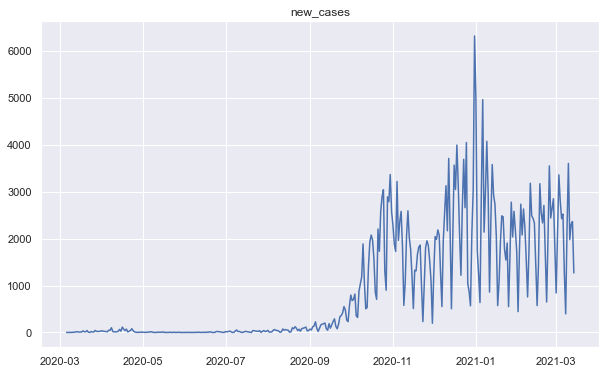

In [44]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_cases'])
plt.title('new_cases')
plt.tick_params(axis='x', rotation=0)

### 3. plot showing the number of new_cases_smoothed with respect to date

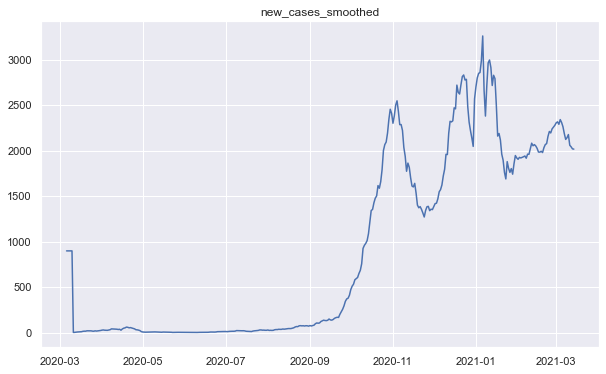

In [45]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_cases_smoothed'])
plt.title('new_cases_smoothed')
plt.tick_params(axis='x', rotation=0)

### 4. plot showing the number of total_deaths with respect to date

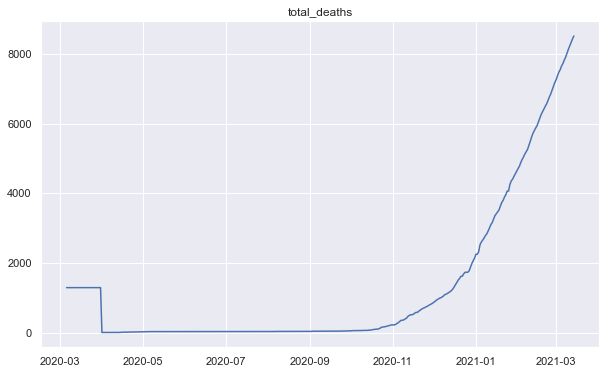

In [46]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['total_deaths'])
plt.title('total_deaths')
plt.tick_params(axis='x', rotation=0)

### 5. plot showing the number of new_deaths with respect to date

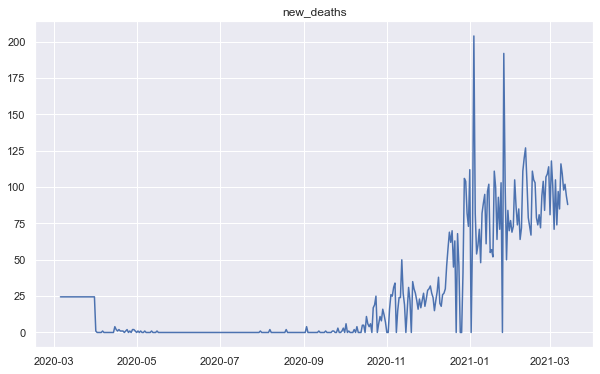

In [47]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_deaths'])
plt.title('new_deaths')
plt.tick_params(axis='x', rotation=0)


### 6. plot showing the number of new_deaths_smoothed with respect to date

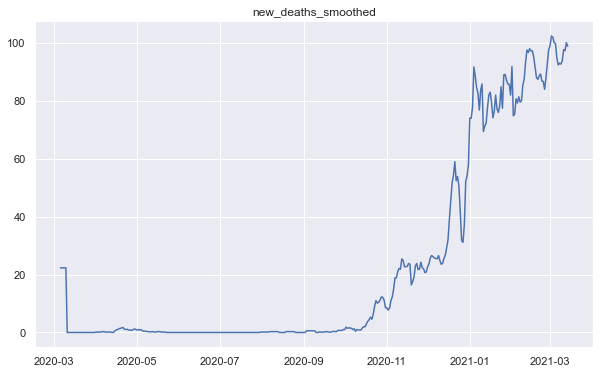

In [48]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_deaths_smoothed'])
plt.title('new_deaths_smoothed')
plt.tick_params(axis='x', rotation=0)

### 7. plot showing the number of total_deaths_per_million with respect to date

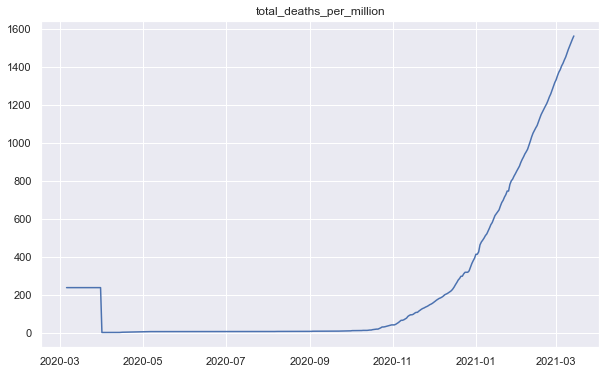

In [49]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['total_deaths_per_million'])
plt.title('total_deaths_per_million')
plt.tick_params(axis='x', rotation=0)

### 8. plot showing the number of new_deaths_per_million with respect to date

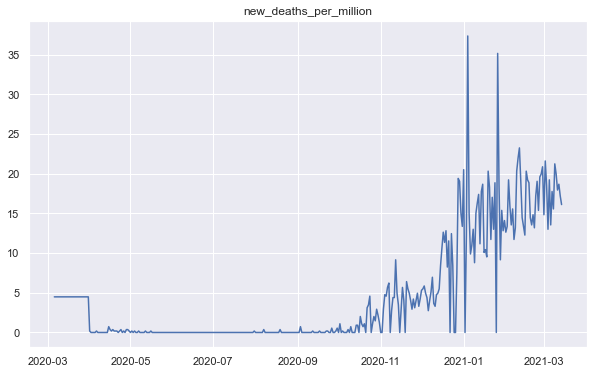

In [50]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_deaths_per_million'])
plt.title('new_deaths_per_million')
plt.tick_params(axis='x', rotation=0)

### 9. plot showing the number of new_deaths_smoothed_per_million with respect to date

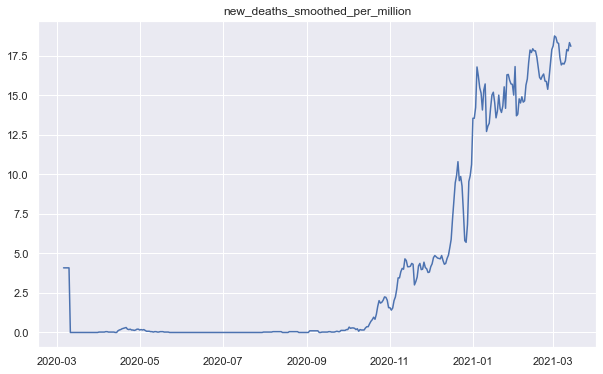

In [51]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_deaths_smoothed_per_million'])
plt.title('new_deaths_smoothed_per_million')
plt.tick_params(axis='x', rotation=0)

### 10. plot showing the number of new_tests with respect to date

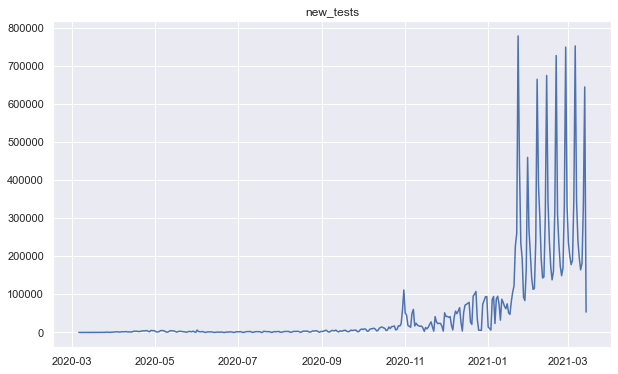

In [52]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['new_tests'])
plt.title('new_tests')
plt.tick_params(axis='x', rotation=0)

### 11. plot showing the number of total_tests with respect to date

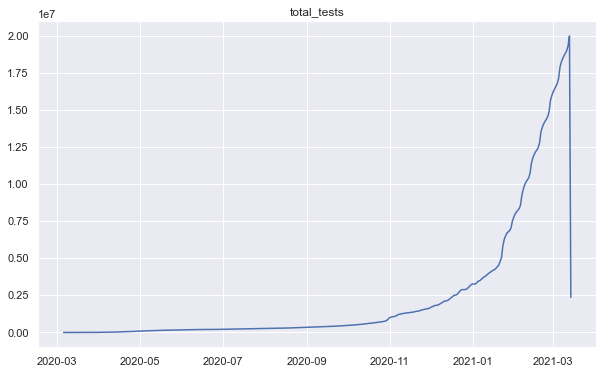

In [53]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['total_tests'])
plt.title('total_tests')
plt.tick_params(axis='x', rotation=0)

### 12. plot showing the number of positive_rate with respect to date

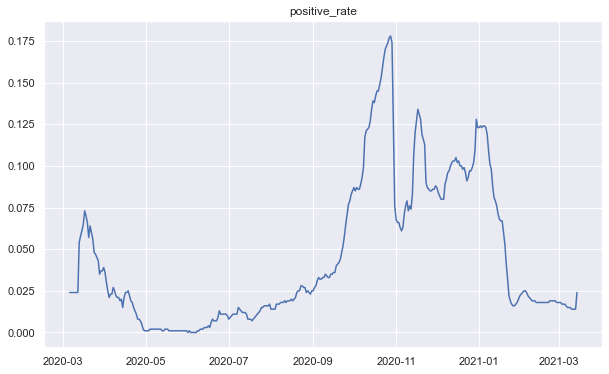

In [54]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['positive_rate'])
plt.title('positive_rate')
plt.tick_params(axis='x', rotation=0)

### 13. plot showing the number of stringency_index with respect to date

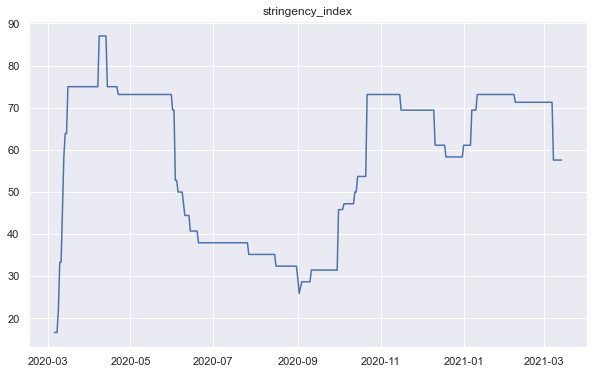

In [55]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['stringency_index'])
plt.title('stringency_index')
plt.tick_params(axis='x', rotation=0)

### 14. plot showing the number of recovered_cases with respect to date

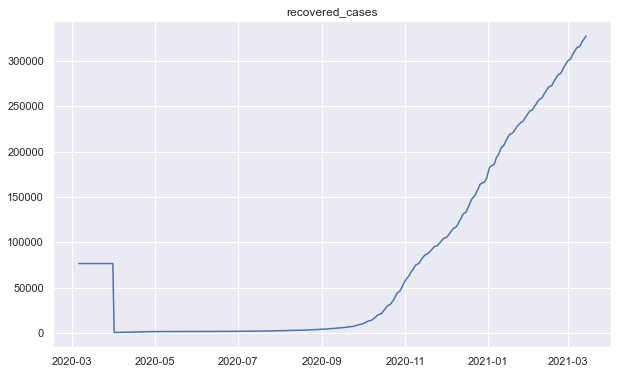

In [56]:
plt.figure(figsize=(10,6))
plt.plot(Slovakia['date'],Slovakia['recovered_cases'])
plt.title('recovered_cases')
plt.tick_params(axis='x', rotation=0)

##  The relation between the total cases and other variable using Scatter plots 

### 1. total cases with respect to new cases

<Figure size 432x216 with 0 Axes>

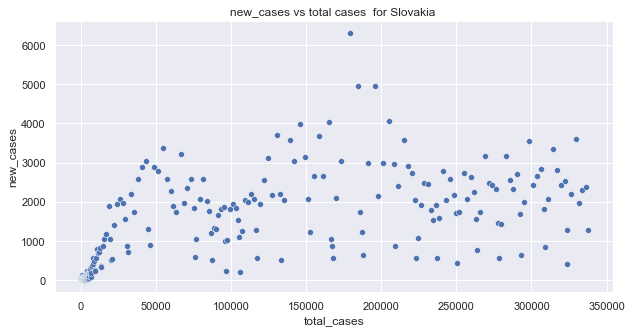

In [57]:
plt.figure()
plt.figure(figsize=(10,5))
g = sns.scatterplot(x=Slovakia.total_cases,y=Slovakia.new_cases,data=Slovakia).set_title("new_cases vs total cases  for Slovakia ")

### 2. total cases with respect to total deaths

<Figure size 432x216 with 0 Axes>

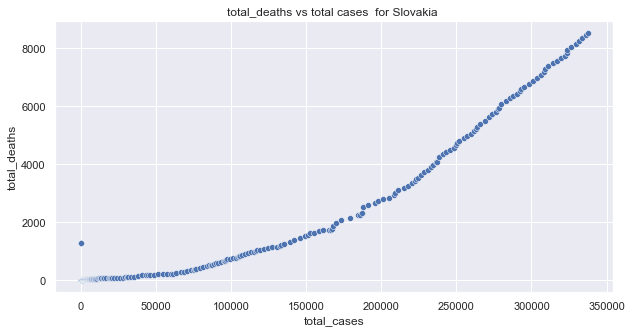

In [58]:
plt.figure()
plt.figure(figsize=(10,5))
g = sns.scatterplot(x=Slovakia.total_cases,y=Slovakia.total_deaths,data=Slovakia).set_title("total_deaths vs total cases  for Slovakia ")

### 3. total cases with respect to new deaths

<Figure size 432x216 with 0 Axes>

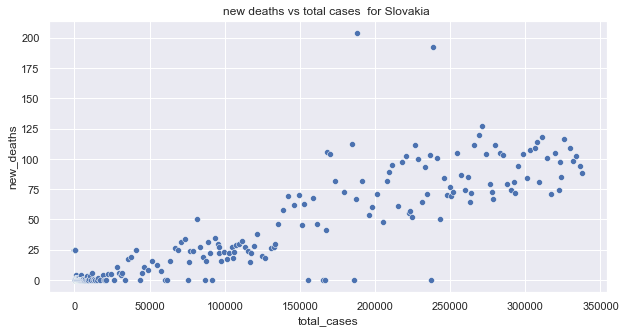

In [59]:
plt.figure()
plt.figure(figsize=(10,5))
g = sns.scatterplot(x=Slovakia.total_cases,y=Slovakia.new_deaths,data=Slovakia).set_title("new deaths vs total cases  for Slovakia ")

### 4. total cases with respect to new tests smoothed

<Figure size 432x216 with 0 Axes>

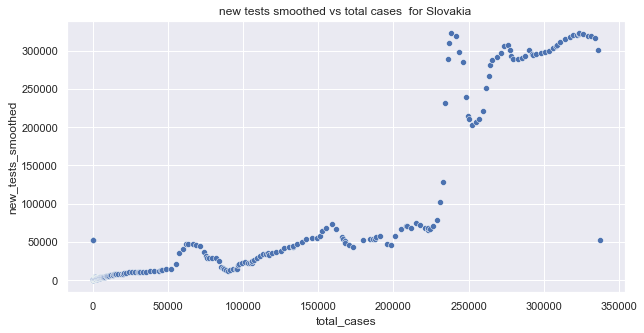

In [60]:
plt.figure()
plt.figure(figsize=(10,5))
g = sns.scatterplot(x=Slovakia.total_cases,y=Slovakia.new_tests_smoothed,data=Slovakia).set_title("new tests smoothed vs total cases  for Slovakia ")

### 5. total cases with respect to reproduction rate

<Figure size 432x216 with 0 Axes>

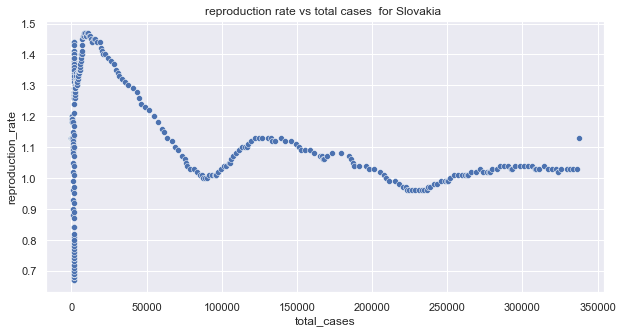

In [61]:
plt.figure()
plt.figure(figsize=(10,5))
g = sns.scatterplot(x=Slovakia.total_cases,y=Slovakia.reproduction_rate,data=Slovakia).set_title("reproduction rate vs total cases  for Slovakia ")

### 6. total cases with respect to new tests

<Figure size 432x216 with 0 Axes>

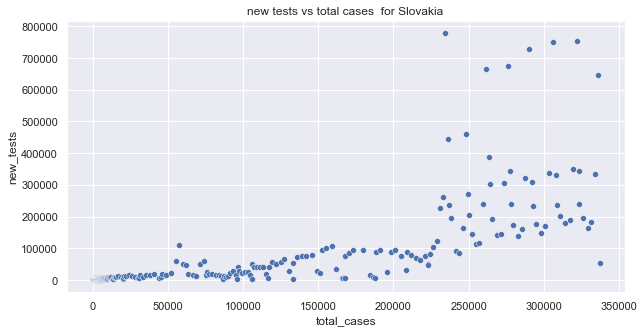

In [62]:
plt.figure()
plt.figure(figsize=(10,5))
g = sns.scatterplot(x=Slovakia.total_cases,y=Slovakia.new_tests,data=Slovakia).set_title("new tests vs total cases  for Slovakia ")

### 7. total cases with respect to positive rate

<Figure size 432x216 with 0 Axes>

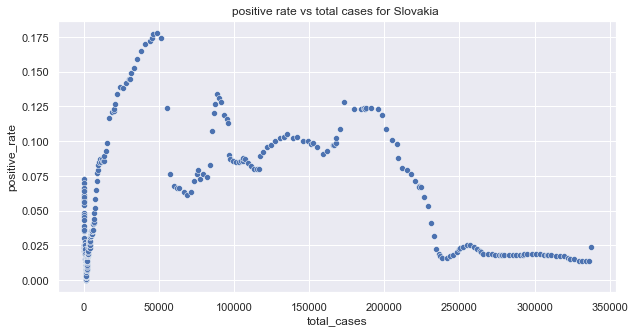

In [63]:
plt.figure()
plt.figure(figsize=(10,5))
g = sns.scatterplot(x=Slovakia.total_cases,y=Slovakia.positive_rate,data=Slovakia).set_title("positive rate vs total cases for Slovakia ")

### 8. total cases with respect to stringency_index

<Figure size 432x216 with 0 Axes>

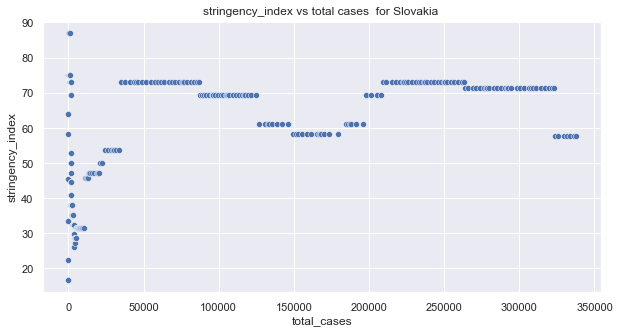

In [64]:
plt.figure()
plt.figure(figsize=(10,5))
g = sns.scatterplot(x=Slovakia.total_cases,y=Slovakia.stringency_index,data=Slovakia).set_title("stringency_index vs total cases  for Slovakia ")

# Adding a new feature 'month' to findout the requirements with respect to each month

In [65]:
Slovakia.columns 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'hosp_patients',
       'hosp_patients_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_dens

### Now, we group the given data in months, so that we can find out the features with respect to each month

In [66]:
Slovakiaa = Slovakia.groupby(Slovakia.month).sum()
new_order = ['March2020', 'April2020','May2020','June2020','July2020',  'August2020','September2020','October2020',  'November2020','December2020', 
        'January2021', 'February2021','March2021',  ]
Slovakiaa = Slovakiaa.reindex(new_order, axis=0)

## The following table tells the variation of each feature with repect to the month

In [67]:
Slovakiaa

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,recovered_cases,year
month,,,,,,,,,,,,,,,,,,,,,
March2020,3440.0,363.0,4773.930046,33556.95977,637.149425,111.61836,630.077,66.488,874.401864,6146.3675,...,18.2,7486.934,189.54,600.6,980.2,151.32,2016.04,22.36,1.988629e+06,52520
April2020,28263.0,1033.0,1092.571000,260.00000,23.000000,19.28700,5176.713,189.204,200.119000,47.6180,...,21.0,8638.770,218.70,693.0,1131.0,174.60,2326.20,25.80,2.697000e+04,60600
May2020,45753.0,125.0,136.715000,832.00000,5.000000,8.71800,8380.218,22.893,25.039000,152.3960,...,21.7,8926.729,225.99,716.1,1168.7,180.42,2403.74,26.66,4.479600e+04,62620
June2020,47133.0,146.0,130.286000,840.00000,0.000000,0.00000,8632.983,26.737,23.862000,153.8700,...,21.0,8638.770,218.70,693.0,1131.0,174.60,2326.20,25.80,4.614700e+04,60600
July2020,60846.0,625.0,567.713000,869.00000,1.000000,0.14300,11144.684,114.475,103.984000,159.1820,...,21.7,8926.729,225.99,716.1,1168.7,180.42,2403.74,26.66,5.935200e+04,62620
August2020,92437.0,1625.0,1495.713000,975.00000,4.000000,4.86200,16930.960,297.640,273.958000,178.5800,...,21.7,8926.729,225.99,716.1,1168.7,180.42,2403.74,26.66,8.983700e+04,62620
September2020,187265.0,6224.0,5205.143000,1172.00000,15.000000,10.85600,34299.861,1140.003,953.387000,214.6630,...,21.0,8638.770,218.70,693.0,1131.0,174.60,2326.20,25.80,1.798690e+05,60600
October2020,891676.0,47523.0,40866.714000,3123.00000,171.000000,144.00100,163321.304,8704.414,7485.237000,572.0190,...,21.7,8926.729,225.99,716.1,1168.7,180.42,2403.74,26.66,8.410300e+05,62620
November2020,2567554.0,48265.0,52710.573000,15661.00000,620.000000,585.57000,470278.735,8840.324,9654.581000,2868.5010,...,21.0,8638.770,218.70,693.0,1131.0,174.60,2326.20,25.80,2.503628e+06,60600


## The following plots gives us the clear picture of each feature of the dataframe with respect to that particular month for country Slovakia (2020-2021)

### 1. line_plot showing the number of total cases for each month

<ipython-input-68-57ceeefa1a8d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'total_cases vs month  for Slovakia')

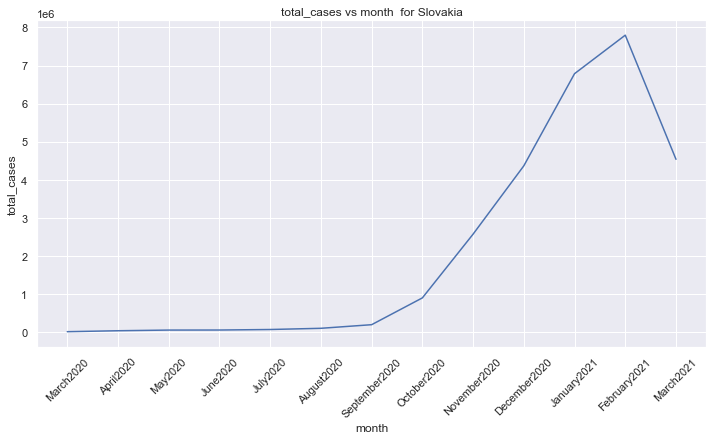

In [68]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.total_cases,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_cases vs month  for Slovakia")

## 2. line_plot showing the number of new cases for each month

<ipython-input-69-38653286b1a4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'new_cases vs month for Slovakia')

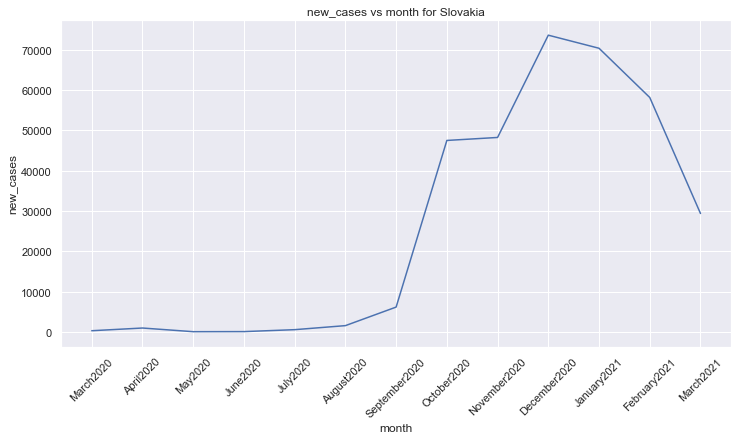

In [69]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.new_cases,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_cases vs month for Slovakia")

## 3. line_plot showing the number of new_cases_smoothed for each month

<ipython-input-70-b24faa45ac9f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'new_cases_smoothed vs month  for Slovakia')

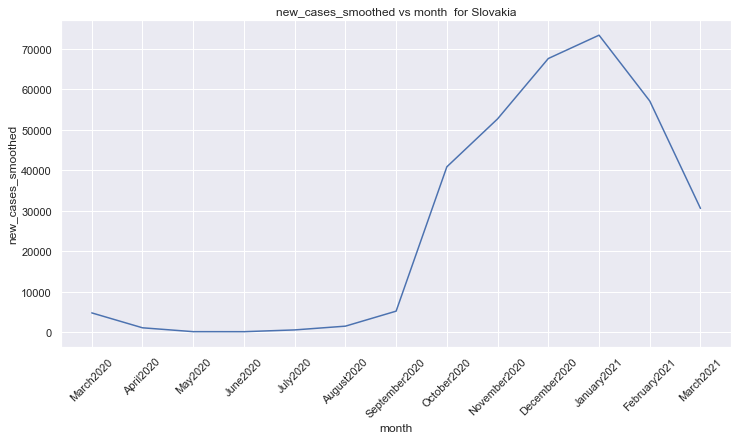

In [70]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.new_cases_smoothed,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_cases_smoothed vs month  for Slovakia")

## 4. line_plot showing the number of total_deaths for each month

<ipython-input-71-3aef93160d47>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'total_deaths vs month  for Slovakia')

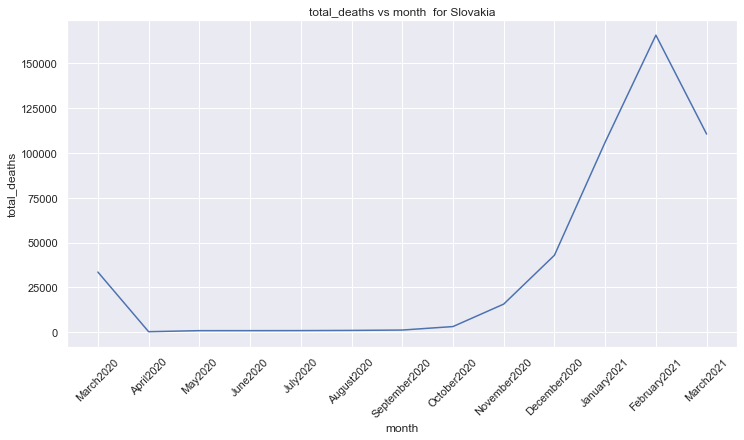

In [71]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.total_deaths,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_deaths vs month  for Slovakia")

## 5. line_plot showing the number of new_deaths for each month

<ipython-input-72-b48c367d80c5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'new_deaths vs month  for Slovakia')

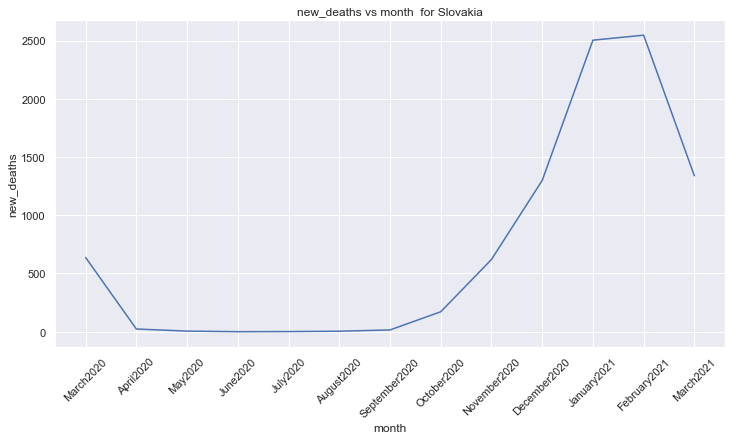

In [72]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.new_deaths,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_deaths vs month  for Slovakia")

## 6. line_plot showing the number of new_deaths_smoothed for each month

<ipython-input-73-13a056e902ef>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'new_deaths_smoothed vs month  for Slovakia')

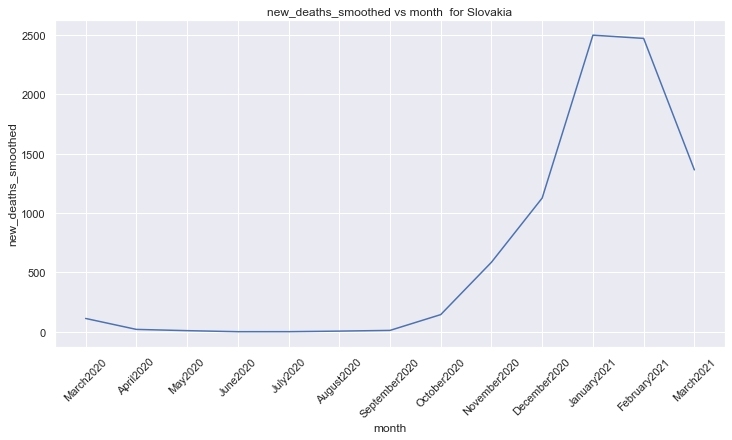

In [73]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.new_deaths_smoothed,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_deaths_smoothed vs month  for Slovakia")

## 7. line_plot showing the number of total_cases_per_million for each month

<ipython-input-74-742788c5f9e2>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'total_cases_per_million vs month  for Slovakia')

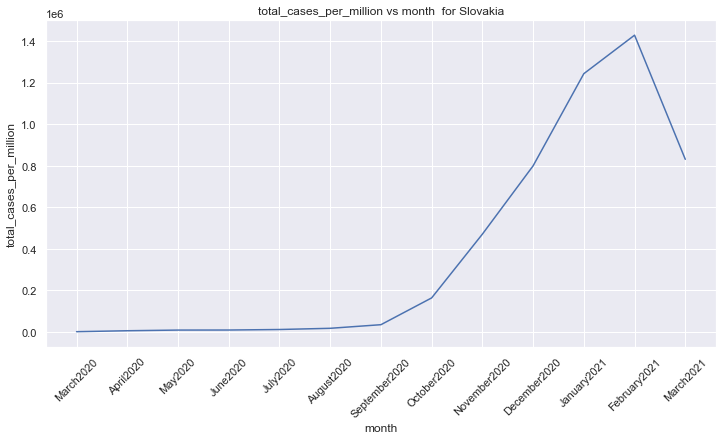

In [74]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.total_cases_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_cases_per_million vs month  for Slovakia")

## 8. line_plot showing the number of new_cases_per_million for each month

<ipython-input-75-2a204afccfe4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'new_cases_per_million vs month  for Slovakia')

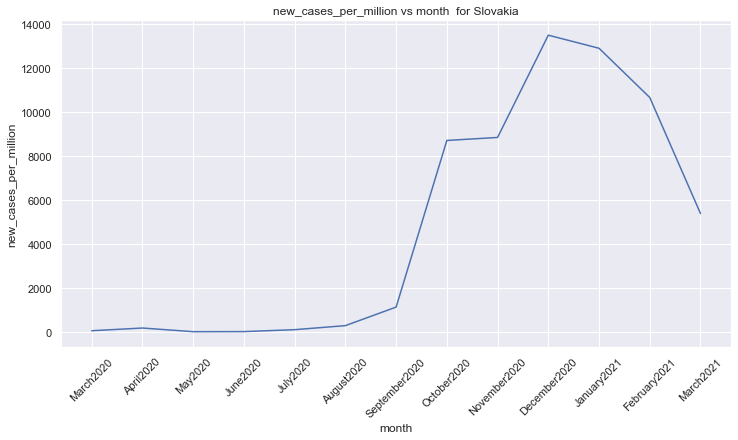

In [75]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.new_cases_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_cases_per_million vs month  for Slovakia")

## 9. line_plot showing the number of total_deaths_per_million for each month

<ipython-input-76-25343b46ba29>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'total_deaths_per_million vs month  for Slovakia')

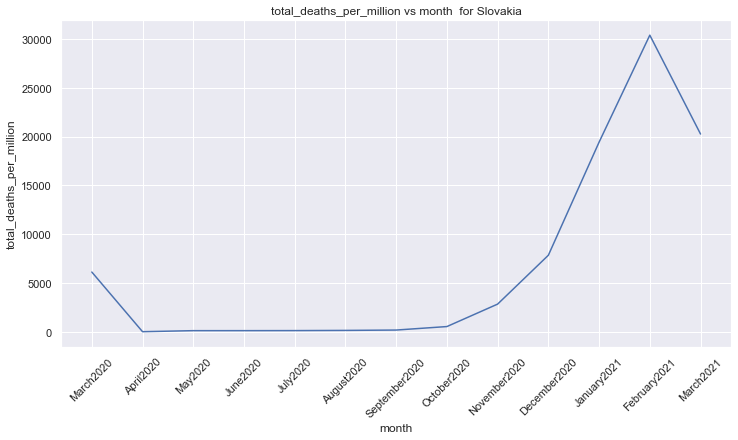

In [76]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.total_deaths_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_deaths_per_million vs month  for Slovakia")

## 10. line_plot showing the number of total_tests for each month

<ipython-input-77-58a105286064>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'total_tests vs month  for Slovakia')

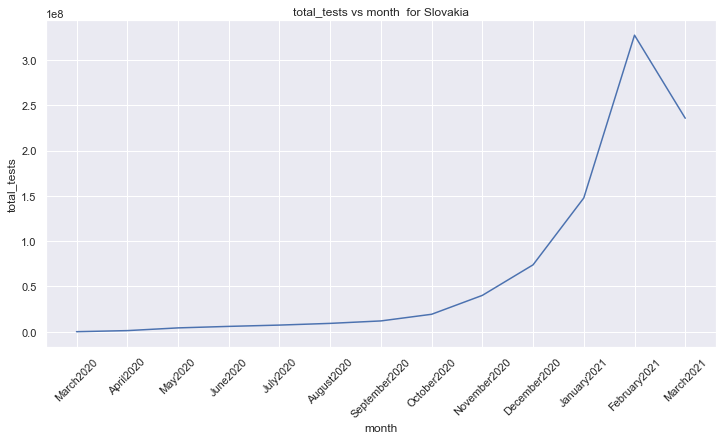

In [77]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.total_tests,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_tests vs month  for Slovakia")

## 11. line_plot showing the number of positive_rate for each month

<ipython-input-78-840c245ce336>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'positive_rate vs month  for Slovakia')

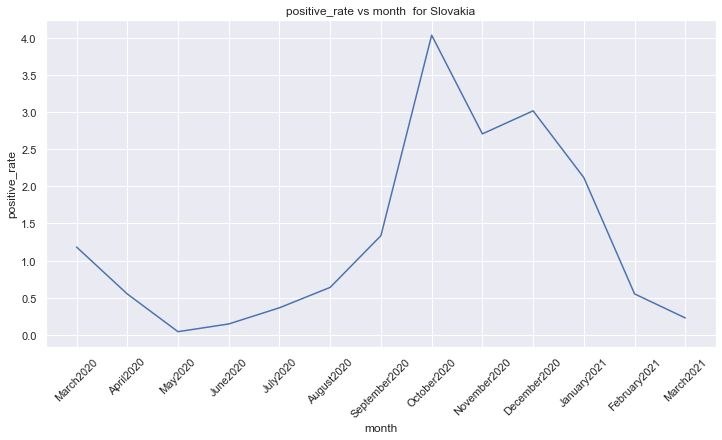

In [78]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.positive_rate,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("positive_rate vs month  for Slovakia")

## 12. line_plot showing the number of stringency_index for each month

<ipython-input-79-1c095d881eef>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'stringency_index vs month  for Slovakia')

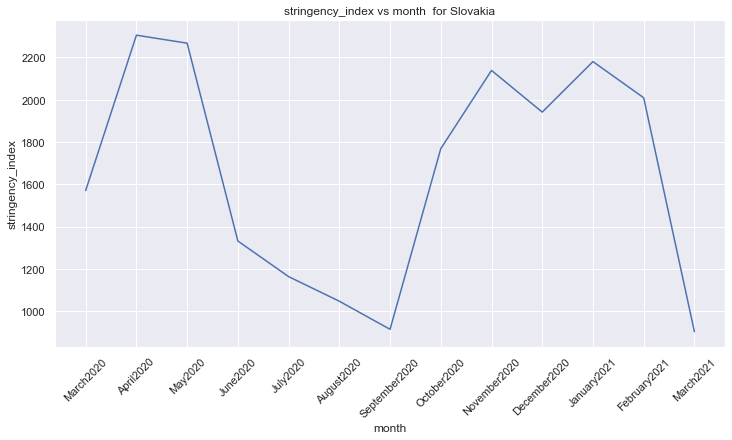

In [79]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.stringency_index,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("stringency_index vs month  for Slovakia")

## 13. plot showing the number of recovered_cases with respect to each month

<ipython-input-80-a9d7f1af3541>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(Slovakiaa.index,rotation=45)


Text(0.5, 1.0, 'recovered_cases vs month  for Slovakia')

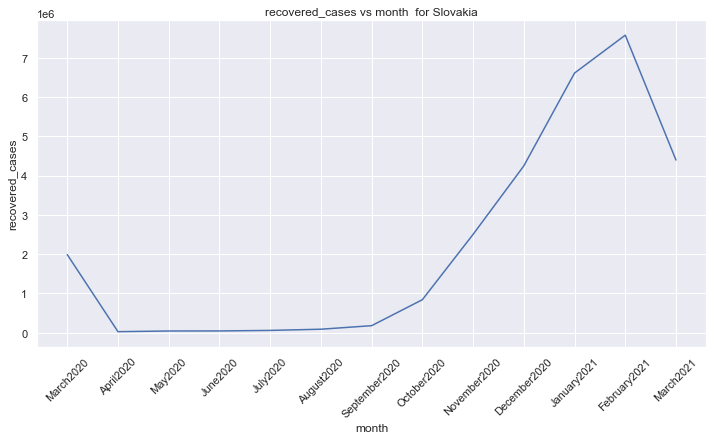

In [80]:
plt.figure(figsize=(12,6))
g = sns.lineplot(x=Slovakiaa.index,y=Slovakiaa.recovered_cases,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("recovered_cases vs month  for Slovakia")

## The above lineplots shows the variation of cases for each month.  We can also plot the same using bar_plot for better understanding for country Slovakia (2020-2021)

## 1. bar_plot showing the number of total_cases for each month

Text(0.5, 1.0, 'total_cases vs month  for Slovakia')

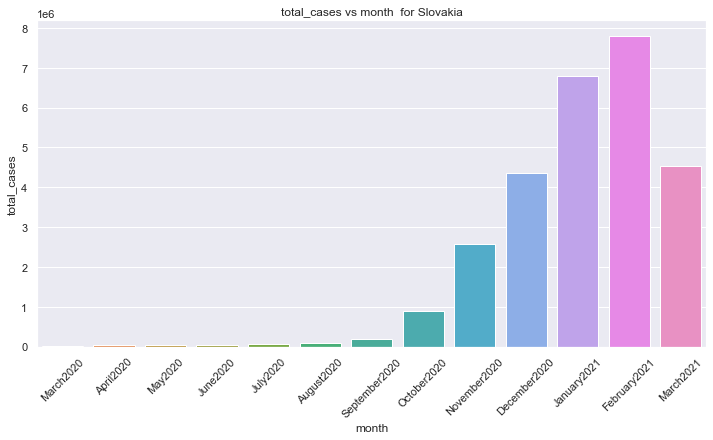

In [81]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.total_cases,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_cases vs month  for Slovakia")

## 2. bar_plot showing the number of new_cases for each month

Text(0.5, 1.0, 'new_cases vs month  for Slovakia')

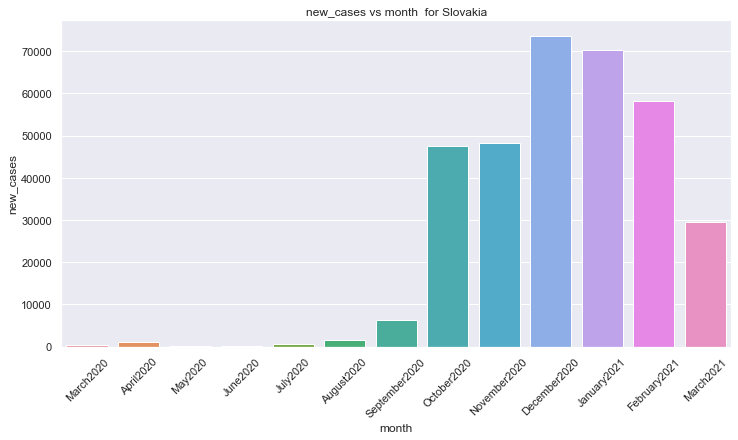

In [82]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.new_cases,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_cases vs month  for Slovakia")

## 3. bar_plot showing the number of total_deaths for each month

Text(0.5, 1.0, 'total_deaths vs month  for Slovakia')

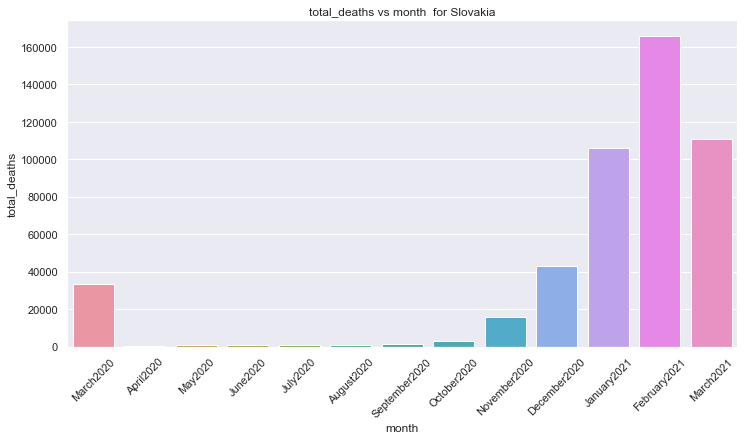

In [83]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.total_deaths,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_deaths vs month  for Slovakia")

## 4. bar_plot showing the number of new_deaths for each month

Text(0.5, 1.0, 'new_deaths vs month  for Slovakia')

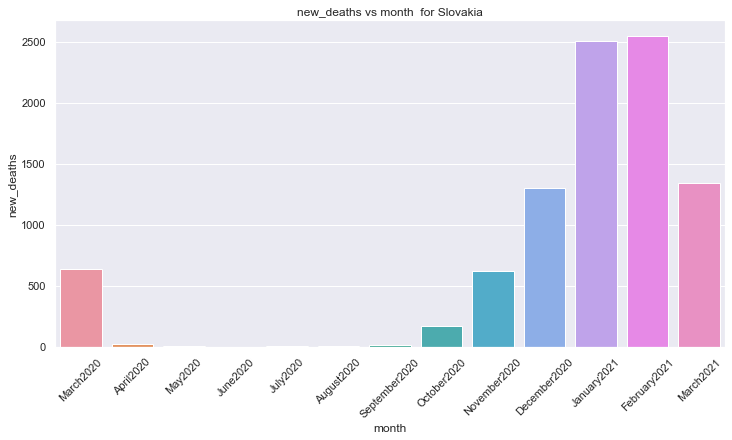

In [84]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.new_deaths,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_deaths vs month  for Slovakia")

## 5. bar_plot showing the number of total_cases_per_million for each month

Text(0.5, 1.0, 'total_cases_per_million vs month  for Slovakia')

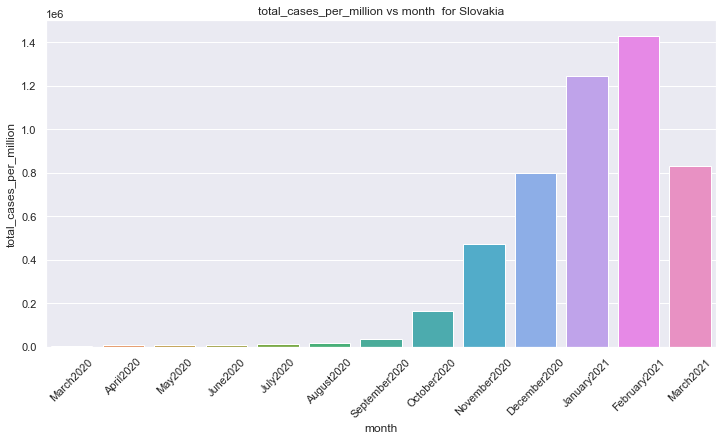

In [85]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.total_cases_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_cases_per_million vs month  for Slovakia")

## 6. bar_plot showing the number of new_cases_per_million for each month

Text(0.5, 1.0, 'new_cases_per_million vs month  for Slovakia')

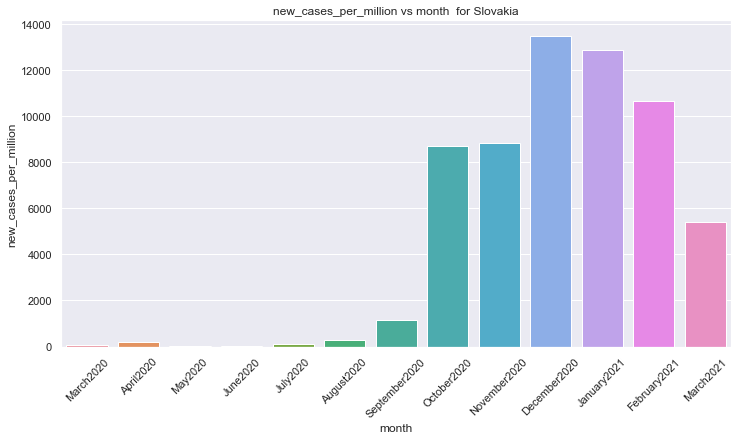

In [86]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.new_cases_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("new_cases_per_million vs month  for Slovakia")

## 7. bar_plot showing the number of total_deaths_per_million for each month

Text(0.5, 1.0, 'total_deaths_per_million vs month  for Slovakia')

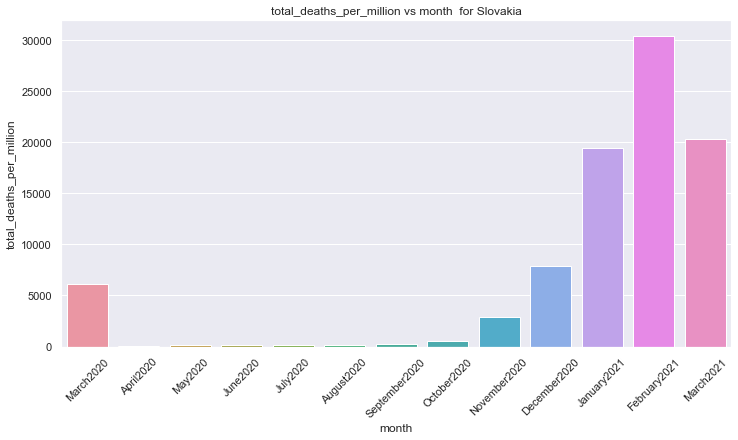

In [87]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.total_deaths_per_million,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_deaths_per_million vs month  for Slovakia")

## 8. bar_plot showing the number of total_tests for each month

Text(0.5, 1.0, 'total_tests vs month  for Slovakia')

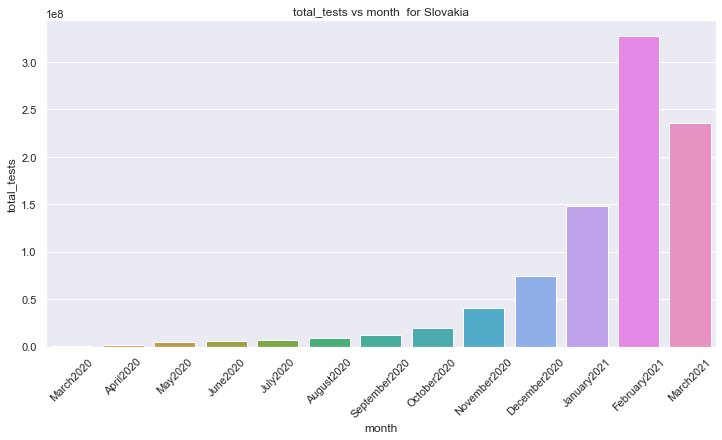

In [88]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.total_tests,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("total_tests vs month  for Slovakia")

## 9. bar_plot showing the number of positive_rate for each month

Text(0.5, 1.0, 'positive_rate vs month  for Slovakia')

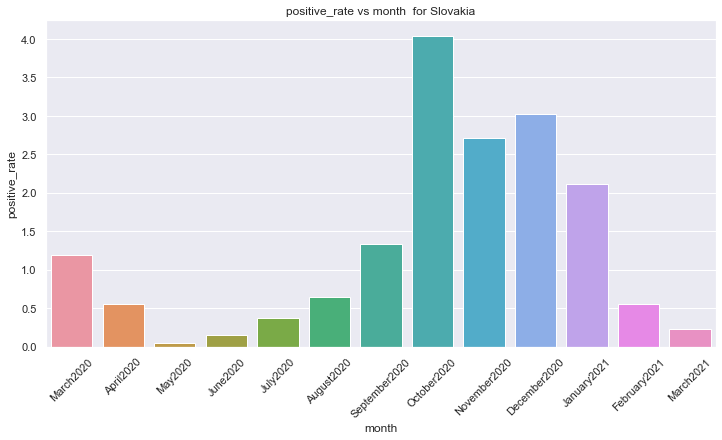

In [89]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.positive_rate,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("positive_rate vs month  for Slovakia")

## 10. bar_plot showing the number of stringency_index for each month

Text(0.5, 1.0, 'stringency_index vs month for Slovakia')

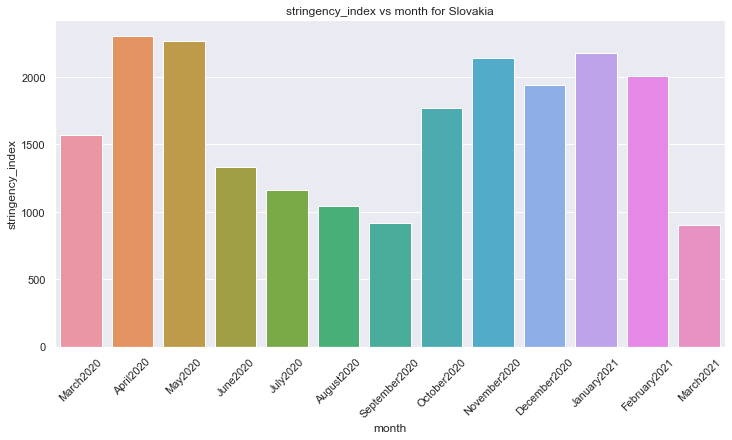

In [90]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=Slovakiaa.index,y=Slovakiaa.stringency_index,data=Slovakiaa)
g.set_xticklabels(Slovakiaa.index,rotation=45)
g.set_title("stringency_index vs month for Slovakia")

# SIR model

### For the epidemical mathematical model, basic models that are based on compartments, as shown in the following, were used:

## So we will only be studying about the SIR model 

# Implementing the following differential equations

# Defining the SIR parameters as follows

# Importing the required libraries!

In [91]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from scipy.integrate import odeint

In [92]:
N = Slovakia.population[0]
N

5459643.0

### Hence the total population is 5459643. hence N = 5459643

In [93]:
mean_r0= Slovakia['reproduction_rate'].mean()
mean_r0

1.1303888888888878

In [94]:
for i in Slovakia['total_cases']:
    if i>0:
        break
i

1.0

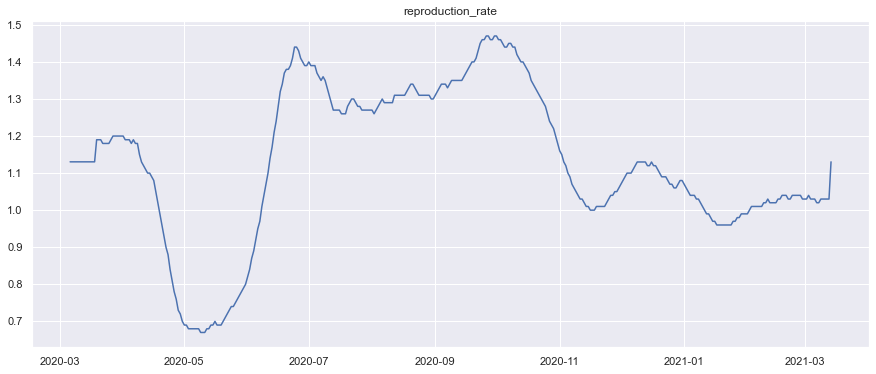

In [95]:
plt.figure(figsize=(15,6))
plt.plot(Slovakia['date'],Slovakia['reproduction_rate'])
plt.title('reproduction_rate')
plt.tick_params(axis='x', rotation=0)

## As per the given condition, we willl be dividing our model into 4 different periods,

## As the conditions mentioned above, we will now find the number of days per each period

## So, we can find the number of days from above data. 

##  Now we need to find the mean value of reproduction [r0]  rate for each period

In [96]:
# period 1 starting from the beginning of the pandemic, the spike of the 1st wave.
r0_period1= Slovakia['reproduction_rate'][0:44].mean()

# period 2 starting of the pandamic till the end of the 1st wave.
r0_period2= Slovakia['reproduction_rate'][0:112].mean()

# period 3 starting from the peak of the 1st wave till the end of the 1st wave.
r0_period3= Slovakia['reproduction_rate'][43:112].mean()

# period 4 starting from the beginning of the 2nd wave till present.
r0_period4= Slovakia['reproduction_rate'][262:].mean()

print('The mean value of reproduction rate for each period is :')
print('')
print('period_1 =',r0_period1)
print('period_2 =',r0_period2)
print('period_3 =',r0_period3)
print('period_4 =',r0_period4)

The mean value of reproduction rate for each period is :

period_1 = 1.1505694444444439
period_2 = 0.9962951388888888
period_3 = 0.8982608695652176
period_4 = 1.039289186507937


## Defining the differential equation for the SIR model

In [97]:
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -(beta * s * i)/N
    didt = +(beta * s * i)/N - [gamma * i]          
    drdt = +gamma * i
    return [dsdt, didt, drdt]

# 1st Iteration

In [98]:
# in the 1st iteration, we are selecting the beta value as the mean of the reproduction rate

# mean value of the reproduction rate
mean_r0= Slovakia['reproduction_rate'].mean()

#t_infectious= 5,t_incubation= 3.3
t_infective = 20 # no of recovery day where infected individual is trasnmitting the virus to the others. its should be between 14 and 20

# initial number of infected and recovered individuals
i_initial11 = 1.0 # its the number of new cases of day 0
r_initial11 = 0.00
s_initial11 = N - i_initial11 - r_initial11

gamma = 1/t_infective
beta11 = mean_r0 # mean_r0 = 1.130

In [99]:
t11 = np.linspace(0, 373, 373)  # Grid of time points (in days)
x_initial5 = s_initial11, i_initial11, r_initial11
soln11 = odeint(deriv, x_initial5, t11, args=(beta11, gamma))
s11, i11, r11 = soln11.T
e = None

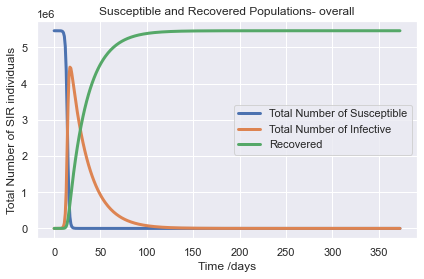

In [100]:
fig= plt.figure()

ax11 = fig.add_subplot(1,2,1)

ax11.plot(t11, s11, lw=3, label='Total Number of Susceptible')
ax11.plot(t11, i11, lw=3, label='Total Number of Infective')
ax11.plot(t11, r11, lw=3, label='Recovered')
ax11.set_title('Susceptible and Recovered Populations- overall')
ax11.set_xlabel('Time /days')
ax11.set_ylabel('Total Number of SIR individuals')
ax11.legend(loc='center right')

fig.set_figheight(4)
fig.set_figwidth(15)

plt.show()

In [101]:
# Evaluating the model MSE and MAE
d11 = {'actual':list(Slovakia['total_cases'][0:373]),'predicted': list(i11) }
result11 = pd.DataFrame(data=d11)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
result11[['actual','predicted']]= scaler.fit_transform(result11[['actual','predicted']])

Mean absolute error: 0.28
Residual sum of squares (MSE): 0.18
 R2 score -4.470731536610885


Text(0.5, 1.0, '1st Iteration')

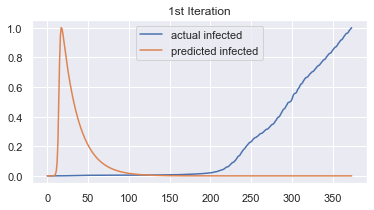

In [102]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(result11.predicted - result11.actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result11.predicted - result11.actual) ** 2))
print(" R2 score",r2_score(result11.predicted,result11.actual))
plt.plot(t11,result11.actual, label='actual infected')
plt.plot(t11,result11.predicted, label='predicted infected')
plt.legend()
plt.title('1st Iteration')

# 2nd Iteration

### Implementing the SIR model for period 1 and period 2

In [103]:
# For period 1
R0_p21 = r0_period1

#t_infectious= 5,t_incubation= 3.3
t_infective = 14 # no of recovery day where infected individual is trasnmitting the virus to the others. its should be between 14 and 20

# initial number of infected and recovered individuals
i_initial21 = 1.0 # its the number of new cases of day 0
r_initial21 = 0.00
s_initial21 = N - i_initial21 - r_initial21 

gamma = 1/t_infective # the removal rate
beta21 = R0_p21 # transmission rate


# For period 2
R0_p22 = r0_period2

#t_infectious= 5,t_incubation= 3.3
t_infective = 14 # no of recovery day where infected individual is trasnmitting the virus to the others. its should be between 14 and 20

# initial number of infected and recovered individuals
i_initial22 = 1.0
r_initial22 = 0.00
s_initial22 = N - i_initial22 - r_initial22

gamma = 1/t_infective
beta22 = R0_p22

In [104]:
t21 = np.linspace(0, 43, 43)  # Grid of time points (in days)
x_initial21 = s_initial21, i_initial21, r_initial21
soln21 = odeint(deriv, x_initial21, t21, args=(beta21, gamma))
s21, i21, r21 = soln21.T
e = None

t22 = np.linspace(0, 112, 112)  # Grid of time points (in days)
x_initial22 = s_initial22, i_initial22, r_initial22
soln2 = odeint(deriv, x_initial22, t22, args=(beta22, gamma))
s22, i22, r22 = soln2.T
e = None

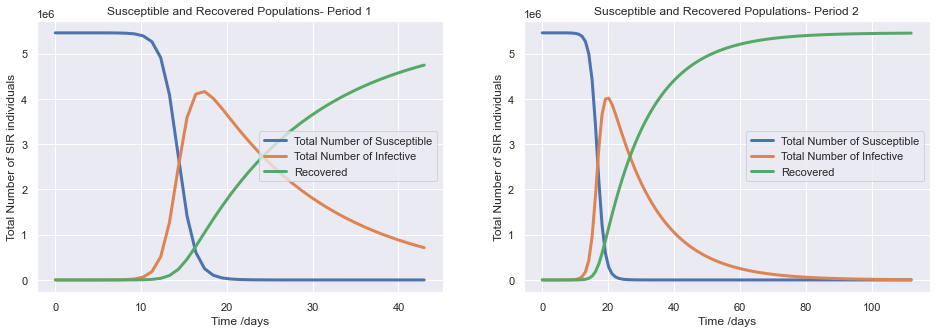

In [105]:
fig= plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t21, s21, lw=3, label='Total Number of Susceptible')
ax1.plot(t21, i21, lw=3, label='Total Number of Infective')
ax1.plot(t21, r21, lw=3, label='Recovered')
ax1.set_title('Susceptible and Recovered Populations- Period 1')
ax1.set_xlabel('Time /days')
ax1.set_ylabel('Total Number of SIR individuals')
ax1.legend(loc='center right')

ax2.plot(t22, s22, lw=3, label='Total Number of Susceptible')
ax2.plot(t22, i22, lw=3, label='Total Number of Infective')
ax2.plot(t22, r22, lw=3, label='Recovered')
ax2.set_title('Susceptible and Recovered Populations- Period 2')
ax2.set_xlabel('Time /days')
ax2.set_ylabel('Total Number of SIR individuals')
ax2.legend(loc='center right')


fig.set_figheight(5)
fig.set_figwidth(16)

plt.show()

### Implementing the model for Period 3 and for Period 4

In [106]:
# For period 3
R0_p23 = r0_period3

#t_infectious= 5,t_incubation= 3.3
t_infective = 14 # no of recovery day where infected individual is trasnmitting the virus to the others. its should be between 14 and 20

# initial number of infected and recovered individuals
i_initial23= Slovakia.loc[43, 'new_cases']
r_initial23= Slovakia.loc[43, 'total_deaths']
s_initial23= N-i_initial23-r_initial23

gamma = 1/t_infective
beta23 = R0_p23

# For period 4
R0_p24 = r0_period4

#t_infectious= 5,t_incubation= 3.3
t_infective = 14# no of recovery day where infected individual is trasnmitting the virus to the others. its should be between 14 and 20

# initial number of infected and recovered individuals
i_initial24= Slovakia.loc[224, 'new_cases']
r_initial24= Slovakia.loc[224, 'total_deaths']
s_initial24= N-i_initial24-r_initial24

gamma = 1/t_infective
beta24 = R0_p24

In [134]:
t23 = np.linspace(0, 69, 69)  # Grid of time points (in days)
x_initial23 = s_initial23, i_initial23, r_initial23
soln23 = odeint(deriv, x_initial23, t23, args=(beta23, gamma))
s23, i23, r23 = soln23.T
e = None

t24 = np.linspace(0, 92, 92)  # Grid of time points (in days)
x_initial24 = s_initial24, i_initial24, r_initial24
soln24 = odeint(deriv, x_initial24, t24, args=(beta24, gamma))
s24, i24, r24 = soln24.T
e = None

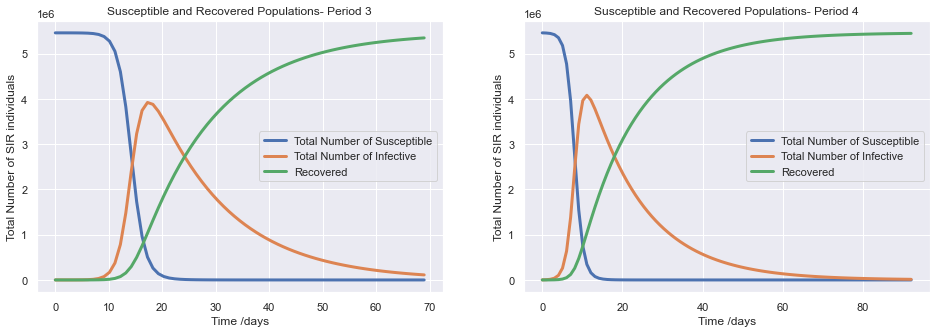

In [135]:
fig= plt.figure()
ax3 = fig.add_subplot(1,2,1)
ax4 = fig.add_subplot(1,2,2)

ax3.plot(t23, s23, lw=3, label='Total Number of Susceptible')
ax3.plot(t23, i23, lw=3, label='Total Number of Infective')
ax3.plot(t23, r23, lw=3, label='Recovered')
ax3.set_title('Susceptible and Recovered Populations- Period 3')
ax3.set_xlabel('Time /days')
ax3.set_ylabel('Total Number of SIR individuals')
ax3.legend()

ax4.plot(t24, s24, lw=3, label='Total Number of Susceptible')
ax4.plot(t24, i24, lw=3, label='Total Number of Infective')
ax4.plot(t24, r24, lw=3, label='Recovered')
ax4.set_title('Susceptible and Recovered Populations- Period 4')
ax4.set_xlabel('Time /days')
ax4.set_ylabel('Total Number of SIR individuals')
ax4.legend()

fig.set_figheight(5)
fig.set_figwidth(16)

plt.show()


### Evaluating the Model according to each period

Mean absolute error: 0.31
Residual sum of squares (MSE): 0.17
 R2 score -0.7041217477819179


Text(0.5, 1.0, 'Period 1 comparison')

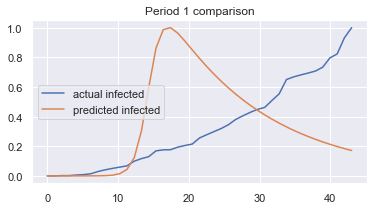

In [136]:
d21 = {'actual':list(Slovakia['total_cases'][0:43]),'predicted': list(i21) }
result21 = pd.DataFrame(data=d21)

from sklearn.preprocessing import MinMaxScaler
scaler21 = MinMaxScaler()
result21[['actual','predicted']]= scaler21.fit_transform(result21[['actual','predicted']])

from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(result21.predicted - result21.actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result21.predicted - result21.actual) ** 2))
print(" R2 score",r2_score(result21.predicted,result21.actual))

plt.plot(t21,result21.actual, label='actual infected')
plt.plot(t21,result21.predicted, label='predicted infected')
plt.legend()
plt.title('Period 1 comparison')

Mean absolute error: 0.15
Residual sum of squares (MSE): 0.07
 R2 score 0.004110825998790979


Text(0.5, 1.0, 'Period 2 comparison')

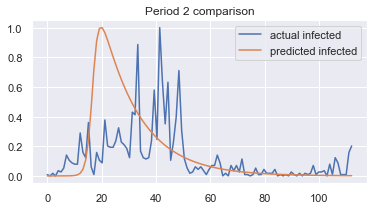

In [137]:
d22 = {'actual':list(Slovakia['new_cases'][0:112]),'predicted': list(i22) }
result22 = pd.DataFrame(data=d22)

scaler22 = MinMaxScaler()
result22[['actual','predicted']]= scaler22.fit_transform(result22[['actual','predicted']])
print("Mean absolute error: %.2f" % np.mean(np.absolute(result22.predicted - result22.actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result22.predicted - result22.actual) ** 2))
print(" R2 score",r2_score(result22.predicted,result22.actual))

plt.plot(t22,result22.actual, label='actual infected')
plt.plot(t22,result22.predicted, label='predicted infected')
plt.legend()
plt.title('Period 2 comparison')


Mean absolute error: 0.31
Residual sum of squares (MSE): 0.18
 R2 score -4.226672116246764


Text(0.5, 1.0, 'Period 3 comparison')

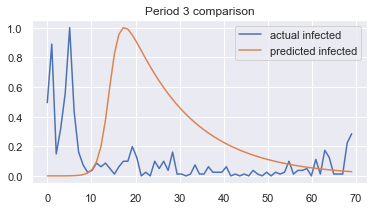

In [138]:
d23= {'actual':list(Slovakia['new_cases'][43:112]),'predicted': list(i23) }
result23 = pd.DataFrame(data=d23)
scaler23 = MinMaxScaler()
result23[['actual','predicted']]= scaler23.fit_transform(result23[['actual','predicted']])
print("Mean absolute error: %.2f" % np.mean(np.absolute(result23.predicted - result23.actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result23.predicted - result23.actual) ** 2))
print(" R2 score",r2_score(result23.actual,result23.predicted))
plt.plot(t23,result23.actual, label='actual infected')
plt.plot(t23,result23.predicted, label='predicted infected')
plt.legend()
plt.title('Period 3 comparison')

In [139]:
len(list(Slovakia['new_cases'][48:112]))

64

Mean absolute error: 0.27
Residual sum of squares (MSE): 0.10
 R2 score -0.37597233702713906


Text(0.5, 1.0, 'Period 4 comparison')

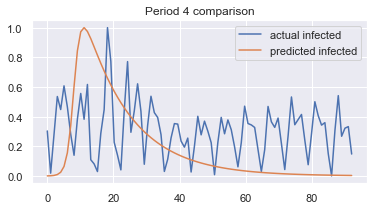

In [177]:
d24= {'actual':list(Slovakia['new_cases'][282:]),'predicted': list(i24) }
result24 = pd.DataFrame(data=d24)
scaler24 = MinMaxScaler()
result24[['actual','predicted']]= scaler24.fit_transform(result24[['actual','predicted']])
print("Mean absolute error: %.2f" % np.mean(np.absolute(result24.predicted - result24.actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result24.predicted - result24.actual) ** 2))
print(" R2 score",r2_score(result24.predicted,result24.actual))
plt.plot(t24,result24.actual, label='actual infected')
plt.plot(t24,result24.predicted, label='predicted infected')
plt.legend()
plt.title('Period 4 comparison')

# 3rd Iteration

### Implementing overall  model 

In [117]:
r0= Slovakia['reproduction_rate'].mean()

# For overall period 
R0_p31 = r0

#t_infectious= 5,t_incubation= 3.3
t_infective = 14 # no of recovery day where infected individual is trasnmitting the virus to the others. its should be between 14 and 20

# initial number of infected and recovered individuals
i_initial31 = i
r_initial31 = 0.00
s_initial31 = N - i_initial31 - r_initial31 

gamma = 1/t_infective
beta31 = 0.7


In [190]:
t31 = np.linspace(0, 105, 105)  # Grid of time points (in days)
x_initial31 = s_initial31, i_initial31, r_initial31
soln31 = odeint(deriv, x_initial31, t31, args=(beta31, gamma))
s31, i31, r31 = soln31.T
e = None

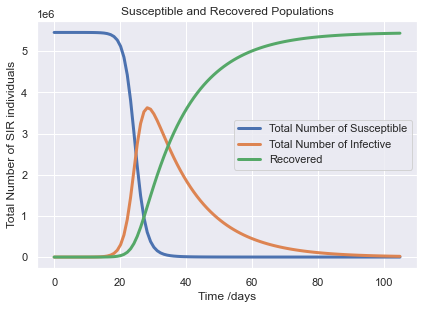

In [191]:
fig= plt.figure()

ax1 = fig.add_subplot(2,2,1)

ax1.plot(t31, s31, lw=3, label='Total Number of Susceptible')
ax1.plot(t31, i31, lw=3, label='Total Number of Infective')
ax1.plot(t31, r31, lw=3, label='Recovered')
ax1.set_title('Susceptible and Recovered Populations')
ax1.set_xlabel('Time /days')
ax1.set_ylabel('Total Number of SIR individuals')
ax1.legend(loc='center right')


fig.set_figheight(10)
fig.set_figwidth(15)

plt.show()

### Evaluating the model for 3rd iteration

Mean absolute error: 0.27
Residual sum of squares (MSE): 0.11
 R2 score -2.6398804687272635


Text(0.5, 1.0, 'Iteration 3 comparison')

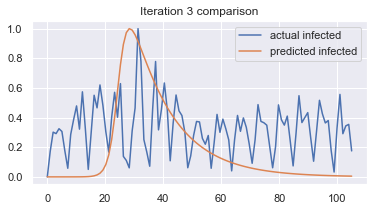

In [194]:
d31= {'actual':list(Slovakia['new_cases'][269:]),'predicted': list(i31) }
result31 = pd.DataFrame(data=d31)
scaler31 = MinMaxScaler()
result31[['actual','predicted']]= scaler31.fit_transform(result31[['actual','predicted']])
print("Mean absolute error: %.2f" % np.mean(np.absolute(result31.predicted - result31.actual)))
print("Residual sum of squares (MSE): %.2f" % np.mean((result31.predicted - result31.actual) ** 2))
print(" R2 score",r2_score(result31.actual,result31.predicted))
plt.plot(t31,result31.actual, label='actual infected')
plt.plot(t31,result31.predicted, label='predicted infected')
plt.legend()
plt.title('Iteration 3 comparison')

# Conclusion 

# Reference

### https://en.wikipedia.org/wiki/Exploratory_data_analysis

### https://towardsdatascience.com/exploratory-data-analysis-eda-techniques-for-kaggle-competition-beginners-be4237c3c3a9

### https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9

### https://ieeexplore.ieee.org/document/9225621